### Loding Python Librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

####  Loading Dataframe 

In [2]:
df  = pd.read_excel("Github_Data.xlsx") 

In [3]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


Shape of Dataframe

In [4]:
df.shape

(6019, 13)

Dataframe information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   object 
 10  Seats              5976 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5976.000000,6019.000000
mean,2013.358199,5.873838e+04,5.279618,9.479468
std,3.269742,9.126884e+04,0.806019,11.187917
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


..

### Data Handling

#### Making copy of original dataframe to perform opreations

In [7]:
df_Cp = df.copy()

Creating new columns

In [8]:
df_Cp['Car_Brand']= df_Cp['Name'].str.split().str[0]
df_Cp['Car_Model']= df_Cp['Name'].apply(lambda cb:' '.join((cb.split()[1:2])))
df_Cp['Car_Varient']= df_Cp['Name'].apply(lambda cv:' '.join((cv.split()[2:])))

Modifing data by replacing values 

In [9]:
df_Cp['Mileage']= df_Cp['Mileage'].replace("km/kg","",regex=True)
df_Cp['Mileage']= df_Cp['Mileage'].replace("kmpl","",regex=True)
df_Cp['Power']  = df_Cp['Power'].replace('bhp',"",regex=True)
df_Cp['Engine'] = df_Cp['Engine'].replace('CC',"",regex=True)
df_Cp['Car_Model'] =df_Cp['Car_Model'].replace('Wagon','WagonR',regex =True)
df_Cp['Fuel_Type']= df_Cp['Fuel_Type'].replace('CNG','Petrol + CNG',regex =True)
df_Cp['Owner_Type'] =df_Cp['Owner_Type'].replace("First","1")\
                     .replace("Second","2")\
                     .replace("Third","3")\
                     .replace("Fourth & Above",'4')

..

Converting String data into numeric

In [11]:
df_Cp['Mileage'] = df_Cp['Mileage'].apply(pd.to_numeric,errors= 'coerce')
df_Cp['Power']   = df_Cp['Power'].apply(pd.to_numeric,errors= 'coerce')
df_Cp['Engine']  = df_Cp['Engine'].apply(pd.to_numeric,errors= 'coerce')
df_Cp['Owner_Type']= df_Cp['Owner_Type'].apply(pd.to_numeric,errors= 'coerce')

Creating New Column for price category

In [12]:
bin=['0 - 5','5 - 10','10 - 15','15 - 20','20 - 30','30 - 50','50 - 75','75 - 100','100 - 130','130 - 160']
df_Cp['Price_Category']=pd.cut(df_Cp['Price'],bins=[0,5,10,15,20,30,50,75,100,130,160], labels=bin)

..

Drop Duplicate Rows And Name Column

In [14]:
df_Cp=df_Cp.drop_duplicates(keep='first')

In [15]:
df_Cp.drop('Name',axis=1,inplace=True)

..

### Missing Values Imputation

In [16]:
df_Cp.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                70
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
Car_Brand               0
Car_Model               0
Car_Varient             0
Price_Category          0
dtype: int64

In [17]:
missing_data = pd.DataFrame(df_Cp.isnull().sum()*100/len(df_Cp)).reset_index()
missing_data

,index,0
0,Location,0.000000
1,Year,0.000000
2,Kilometers_Driven,0.000000
3,Fuel_Type,0.000000
4,Transmission,0.000000
5,Owner_Type,0.000000
6,Mileage,1.162984
7,Engine,0.598106
8,Power,2.375810
9,Seats,0.714404


..

Missing values in data before Imputation

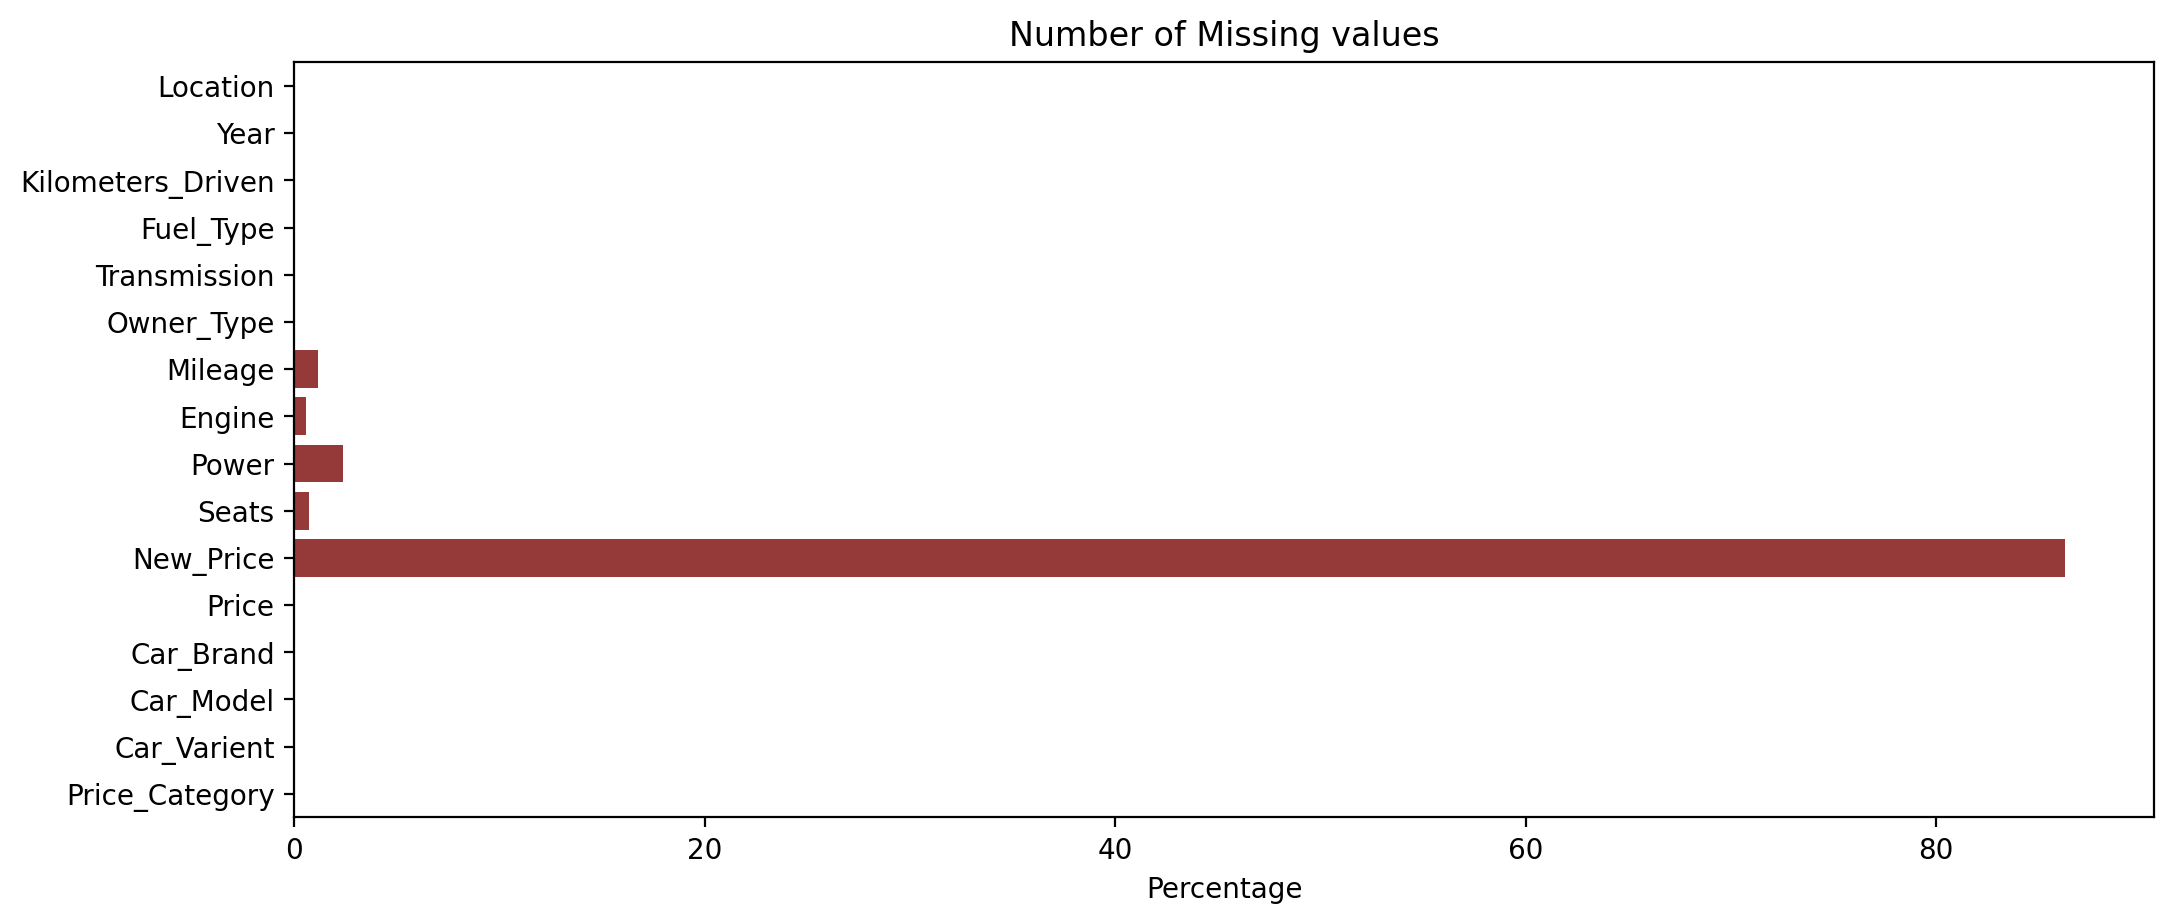

In [18]:
fig= plt.figure(figsize=(12,5),dpi=200)
sns.barplot(0,'index',data= missing_data,color='brown',orient="h")
plt.title("Number of Missing values")
plt.xlabel("Percentage")
plt.ylabel("")
plt.show()

In [19]:
df_Cp.groupby(['Car_Brand'])[['Mileage','Power','Engine']].mean()

,Mileage,Power,Engine
Car_Brand,,,
Ambassador,12.800000,35.500000,1489.000000
Audi,15.236340,192.106043,2281.758475
BMW,16.989700,209.819847,2323.221374
Bentley,8.600000,552.000000,5998.000000
Chevrolet,18.401157,90.604583,1363.876033
Datsun,21.590769,59.716923,983.153846
Fiat,18.018519,87.155652,1267.200000
Force,17.000000,139.030000,2183.000000
Ford,18.529933,96.755593,1597.603333


..

Replacing the integer null values with their respective mean().

In [20]:
Car_brands_list = df_Cp['Car_Brand'].unique().tolist()

In [21]:

try:
    for i in Car_brands_list:
        df_Cp['Mileage'][(df_Cp['Mileage'].isnull()==True) & (df_Cp['Car_Brand'] == i)] = df_Cp['Mileage'][(df_Cp['Mileage'].isnull()== False) & (df_Cp['Car_Brand']==i)].mean()
        df_Cp['Power'][(df_Cp['Power'].isnull()==True) & (df_Cp['Car_Brand'] == i)] = df_Cp['Power'][(df_Cp['Power'].isnull()== False) & (df_Cp['Car_Brand']==i)].mean()
        df_Cp['Engine'][(df_Cp['Engine'].isnull()==True) & (df_Cp['Car_Brand'] == i)] = df_Cp['Engine'][(df_Cp['Engine'].isnull()== False) & (df_Cp['Car_Brand']==i)].mean()
        df_Cp['Seats'][(df_Cp['Seats'].isnull()==True) & (df_Cp['Car_Brand'] == i)] = int(df_Cp['Seats'][(df_Cp['Seats'].isnull()== False) & (df_Cp['Car_Brand']==i)].mean())
        
except:
    print('Something Went Worng')

In [22]:
df_Cp.isnull().sum()


Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   1
Seats                   0
New_Price            5195
Price                   0
Car_Brand               0
Car_Model               0
Car_Varient             0
Price_Category          0
dtype: int64

..

Since New_Price column Have 86% of Null Values: Dropping the Column

In [23]:
 
df_Cp.drop('New_Price',axis=1,inplace=True)

Replacing 2 null values for Mileage and Power

In [138]:
# df_Cp.loc[df_Cp['Mileage'].isnull()==True]
#--------------------OR----------------------------
df_Cp[df_Cp['Mileage'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category


In [25]:
df_Cp['Power'][df_Cp['Power'].isnull()]= df_Cp['Power'][df_Cp['Power'].notnull()].mean()
df_Cp['Mileage'][df_Cp['Mileage'].isnull()]= df_Cp['Mileage'][df_Cp['Mileage'].notnull()].mean()

..

Missing Values after Imputation

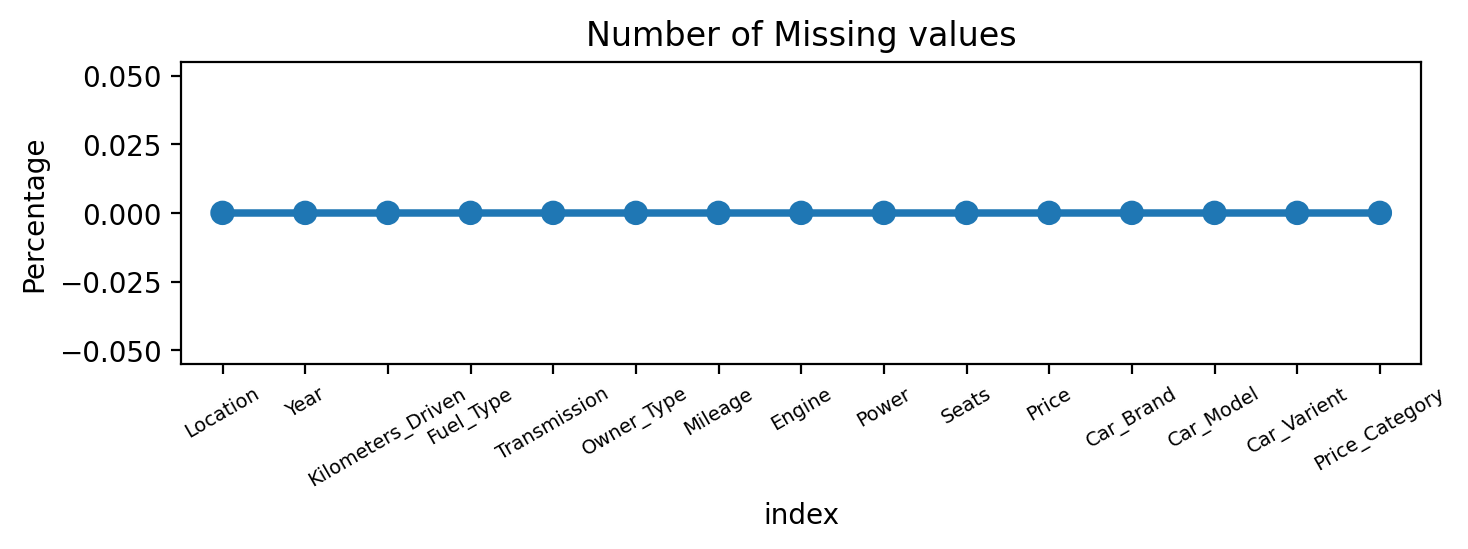

In [26]:
missing_data_Now = pd.DataFrame(df_Cp.isnull().sum()*100/len(df_Cp)).reset_index()

fig= plt.figure(figsize=(8,2),dpi=200)
sns.pointplot('index',0,data= missing_data_Now)
# sns.linetplot( 'index',0,data= missing_telco)
plt.title("Number of Missing values")
plt.ylabel("Percentage")
plt.xticks(rotation =30,fontsize =7)
plt.show()

In [151]:
df_Cp.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
0,Mumbai,2010,72000,Petrol + CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti,WagonR,R LXI CNG,0 - 5
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,10 - 15
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V,0 - 5


Saving cleaned data in excel file

In [27]:
df_Cp.to_excel('MyUsedCarAnalysis_Cleandata.xlsx')

..

### Data Analysis And Visualisations of all Cities

#### Number of Cars Available for sale in Different Cities

In [28]:
City= df_Cp['Location'].value_counts().reset_index()
City.rename(columns = {'index':'Location', 'Location':'Count'},inplace=True)
City.T

,0,1,2,3,4,5,6,7,8,9,10
Location,Mumbai,Hyderabad,Kochi,Coimbatore,Pune,Delhi,Kolkata,Chennai,Jaipur,Bangalore,Ahmedabad
Count,790,742,651,636,622,554,535,494,413,358,224


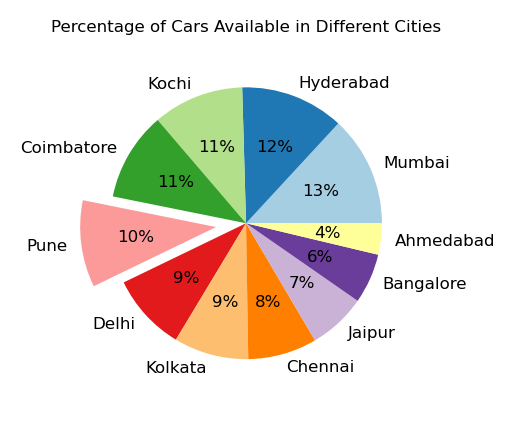

In [29]:
fig= plt.figure(figsize=(3,2.5),dpi=200,edgecolor='red')
color = sns.color_palette('Paired')
plt.pie(City['Count'],labels=City['Location'],colors=color,radius=0.9,textprops={'fontsize': 6},autopct='%.0f%%', explode= [0,0,0,0,0.2,0,0,0,0,0,0])
plt.title("Percentage of Cars Available in Different Cities",fontsize=6,pad = 0) 
plt.show()

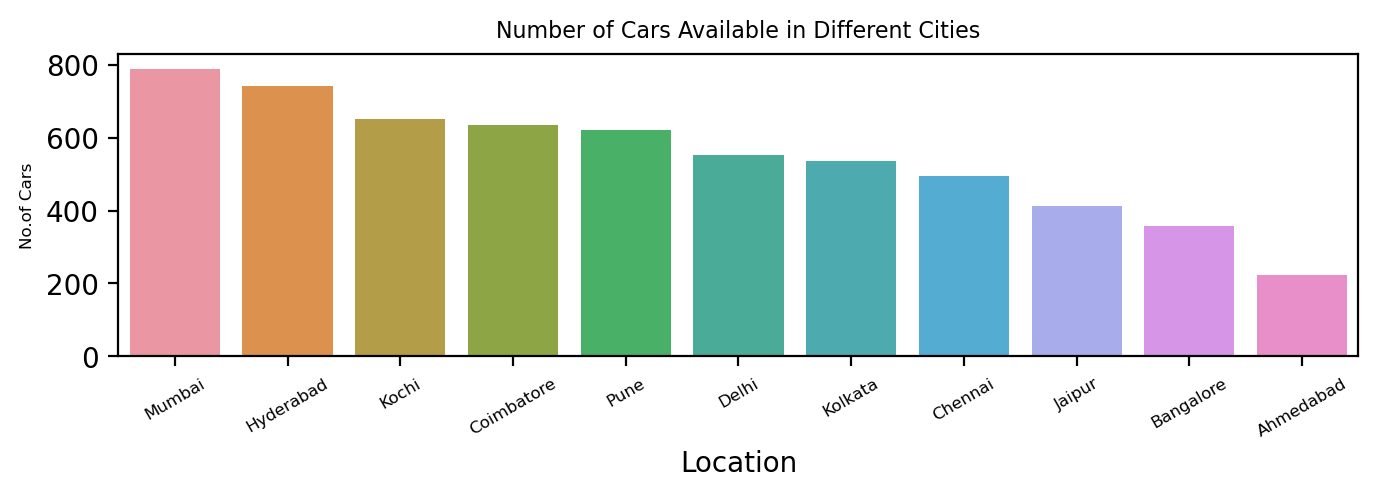

In [137]:
plt.figure(figsize=(8,2),dpi=200)
sns.countplot( data=df_Cp,x='Location',order= df_Cp['Location'].value_counts().index)
plt.title("Number of Cars Available in Different Cities",fontsize =8)
plt.ylabel("No.of Cars",fontsize =6)
plt.xticks(rotation =30,fontsize =6)
plt.show()

#### Cars Availbale in All Cities Based on Owner_Type 

In [164]:
OW_C= df_Cp.groupby(['Car_Brand'])['Owner_Type'].count().reset_index()
OW_C.rename(columns = {'Owner_Type':'Count'},inplace=True)
OW_C= OW_C.sort_values(['Count'],ascending=False)
OW_C.T

,18,10,9,28,19,29,8,17,2,1,...,23,14,5,7,11,0,26,12,3,15
Car_Brand,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi,...,Porsche,Jeep,Datsun,Force,ISUZU,Ambassador,Smart,Isuzu,Bentley,Lamborghini
Count,1211,1107,608,411,318,315,300,272,267,236,...,18,15,13,3,2,1,1,1,1,1


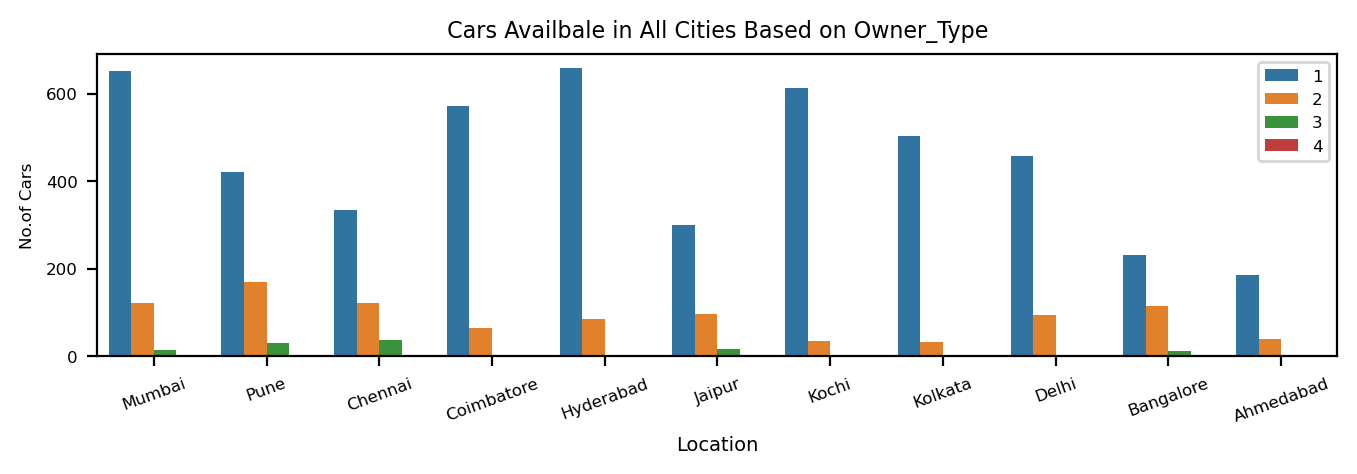

In [142]:
plt.figure(figsize=(8,2),dpi=200)
sns.countplot( data=df_Cp,x='Location',hue='Owner_Type')
plt.title(" Cars Availbale in All Cities Based on Owner_Type ",fontsize=8)
plt.legend(loc='upper right',fontsize=6)
plt.ylabel("No.of Cars",fontsize =6)
plt.xlabel('Location',fontsize=7)
plt.xticks(rotation=20,fontsize =6)
plt.yticks(fontsize=6)
plt.show()

#### Cars Availbale in All Cities Based on Fuel_Type

In [160]:
FU_C= df_Cp.groupby(['Location','Fuel_Type'])['Car_Brand'].count().reset_index()
FU_C.rename(columns = {'Car_Brand':'Count'},inplace=True)
FU_C= FU_C.sort_values(['Count'],ascending=False)
FU_C.T

,14,29,9,22,33,26,11,21,5,31,...,23,15,2,17,19,8,27,28,6,32
Location,Hyderabad,Mumbai,Coimbatore,Kochi,Pune,Mumbai,Delhi,Kochi,Chennai,Pune,...,Kochi,Hyderabad,Ahmedabad,Hyderabad,Jaipur,Chennai,Mumbai,Mumbai,Chennai,Pune
Fuel_Type,Diesel,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Diesel,Diesel,Diesel,...,Petrol + CNG,LPG,Petrol + CNG,Petrol + CNG,LPG,Petrol + CNG,Electric,LPG,Electric,LPG
Count,506,458,356,339,320,313,306,304,289,288,...,8,6,3,3,2,2,1,1,1,1


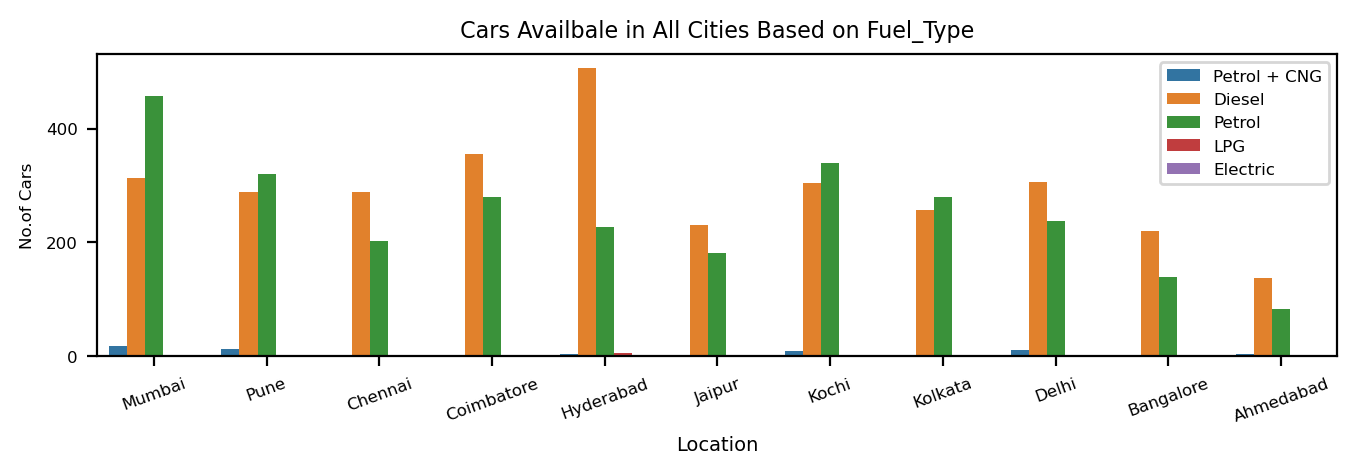

In [158]:
plt.figure(figsize=(8,2),dpi=200)
sns.countplot( data=df_Cp,x='Location',hue='Fuel_Type')
plt.title(" Cars Availbale in All Cities Based on Fuel_Type ",fontsize=8)
plt.legend(loc='upper right',fontsize=6)
plt.ylabel("No.of Cars",fontsize =6)
plt.xlabel('Location',fontsize=7)
plt.xticks(rotation=20,fontsize =6)
plt.yticks(fontsize=6)
plt.show()

#### Automatic Vs Manual Cars Available in Different Cities

In [31]:
Transmission_Count= df_Cp.groupby(['Transmission'])['Car_Brand'].count().reset_index()
Transmission_Count.rename(columns = {'Car_Brand':'Count'},inplace=True)
Transmission_Count.T

,0,1
Transmission,Automatic,Manual
Count,1720,4299


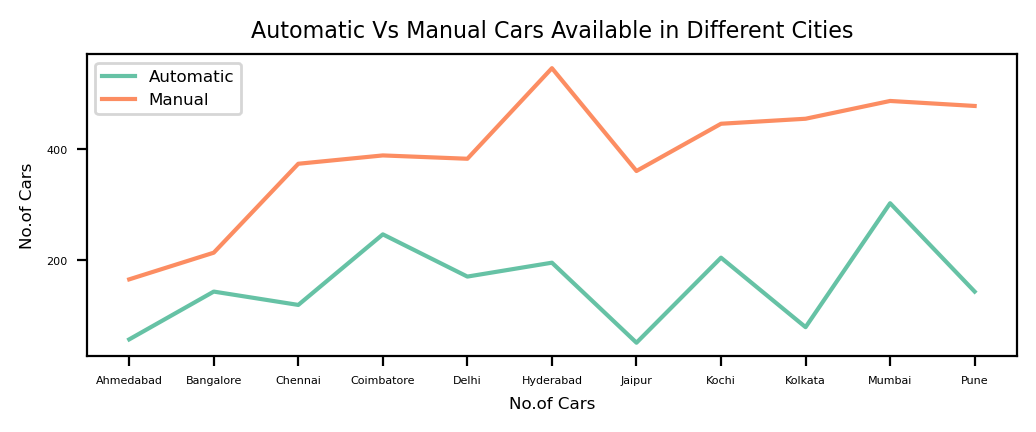

In [148]:
Trans= df_Cp.groupby(['Location','Transmission'])['Car_Brand'].count().reset_index()
Trans.rename(columns = {'Car_Brand':'Count'},inplace=True)

plt.figure(figsize=(6,2),dpi=200)
sns.lineplot( x='Location',y='Count',hue='Transmission',data=Trans,palette='Set2')
plt.title("Automatic Vs Manual Cars Available in Different Cities",fontsize=8)
plt.legend(loc='upper left',fontsize=6)
plt.xlabel("No.of Cars",fontsize=6)
plt.ylabel("No.of Cars",fontsize=6)
plt.xticks(fontsize =4)
plt.yticks(fontsize =4)
plt.show()

#### Price Range of cars in Different Cities

In [149]:
Pri_ge= df_Cp.groupby(['Location']).agg({'Price': [ 'min','mean', 'max']}).reset_index()
Pri_ge.rename(columns = {'Price':'Price_Range'},inplace=True)
Pri_ge.T

0          1         2           3         4   \
Location          Ahmedabad  Bangalore   Chennai  Coimbatore     Delhi   
Price_Range min        0.75       1.35      0.65        1.68      0.75   
            mean   8.457321  13.328631  7.753623   15.078223  9.707726   
            max        85.0       93.0      70.0       93.67     120.0   

                         5         6          7         8         9         10  
Location          Hyderabad    Jaipur      Kochi   Kolkata    Mumbai      Pune  
Price_Range min         0.6      0.45       1.26      0.65      0.55      0.44  
            mean    9.77655  5.809225  11.179186  5.661215  9.429329  6.726254  
            max       160.0      42.5      97.07      75.0      75.0      68.0

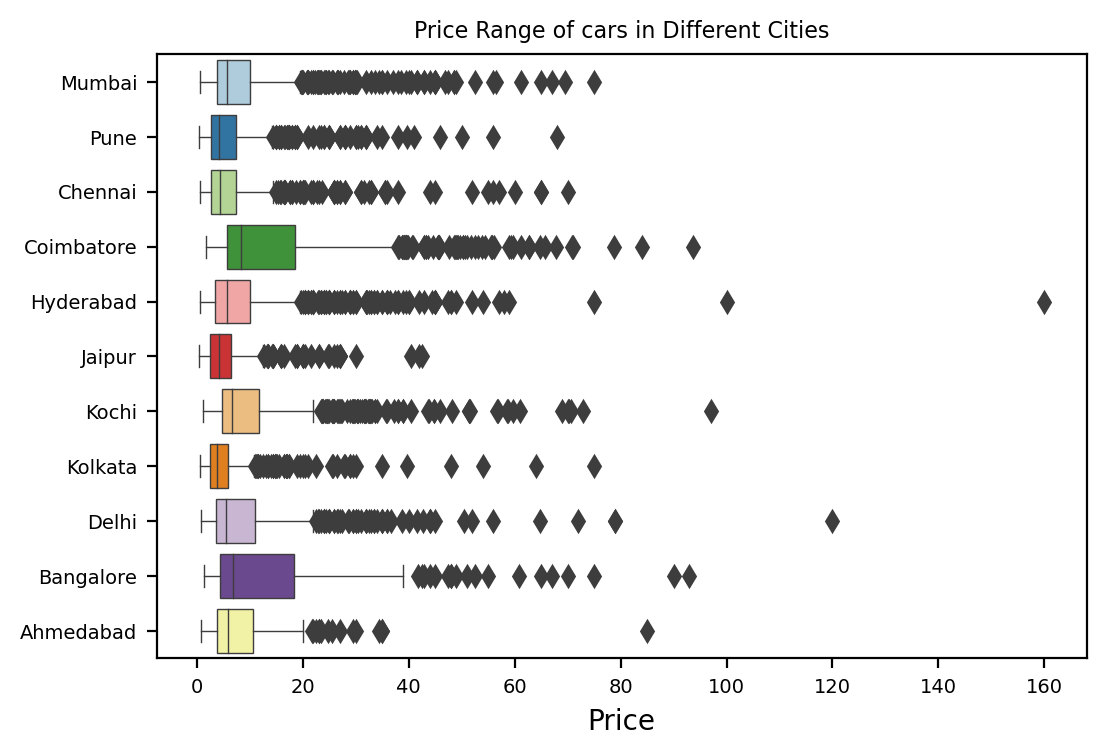

In [150]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot( y='Location',x='Price',orient='h',data=df_Cp,palette="Paired",linewidth=0.5)
plt.title("Price Range of cars in Different Cities",fontsize=8)
plt.ylabel('')
plt.xticks(fontsize =7)
plt.yticks(fontsize =7)
plt.show()

#### Cars with Max & Min Prices Among All Cities.

In [209]:
df_Cp[df_Cp['Price']==df_Cp['Price'].max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
4079,Hyderabad,2017,25000,Diesel,Automatic,1,13.33,2993.0,255.0,5.0,160.0,Land,Rover,Range Rover 3.0 Diesel LWB Vogue,130 - 160


In [206]:
df_Cp[df_Cp['Price']==df_Cp['Price'].min()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
1713,Pune,2011,65000,Petrol,Manual,2,26.0,624.0,35.0,4.0,0.44,Tata,Nano,Lx,0 - 5


..

### Insights From All Cities:
- The availability of cars in 'Mumbai' i.e 790 is the highest among all other cities.
- 'Maruti' brand cars are widely available with a count of around 1211 cars in all the cities, followed by Hyundai(1107+), Honda(608), Toyota(411+)
- Most of the cars runs with 'Disel' with a count of 506.
- Availability based on Gear - Automatic(1270), Manual(4299)
- Automatic car availble among all cities: Mumbai(300+)
- Manual car availble among all cities: Hyderabad(500+)
- High budget car among all cities: Land	Rover Range Rover 3.0 Diesel LWB Vogue (2017)-160Lakhs
- Low budget car among all cities: Tata Nano Lx Petrol (2011) - 0.44Lakhs

..


# PUNE
#### Data Analysis and visualisation 

In [42]:
df_Pune = df_Cp.loc[df_Cp['Location']=='Pune']
df_Pune.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
1,Pune,2015,41000,Diesel,Manual,1,19.670000,1582.0,126.2,5.0,12.5,Hyundai,Creta,1.6 CRDi SX Option,10 - 15
8,Pune,2013,64430,Diesel,Manual,1,20.540000,1598.0,103.6,5.0,5.2,Volkswagen,Vento,Diesel Comfortline,5 - 10
14,Pune,2012,85000,Diesel,Automatic,2,12.893137,2179.0,115.0,5.0,17.5,Land,Rover,Freelander 2 TD4 SE,15 - 20


In [43]:
df_Pune.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,2012.273312,70555.000000,1.376206,18.245326,1546.516109,103.961182,5.265273,6.726254
std,3.527106,39619.384278,0.589724,4.263174,530.744652,43.808453,0.799789,7.572787
min,1999.000000,1000.000000,1.000000,8.450000,624.000000,35.000000,2.000000,0.440000
25%,2010.000000,43905.500000,1.000000,15.100000,1197.000000,74.000000,5.000000,2.742500
50%,2013.000000,66255.000000,1.000000,17.800000,1396.000000,88.730000,5.000000,4.250000
75%,2015.000000,90000.000000,2.000000,20.882500,1798.000000,121.300000,5.000000,7.445000
max,2019.000000,282000.000000,4.000000,33.540000,3498.000000,321.000000,10.000000,68.000000


#### No. of Cars per Brand Available in Pune

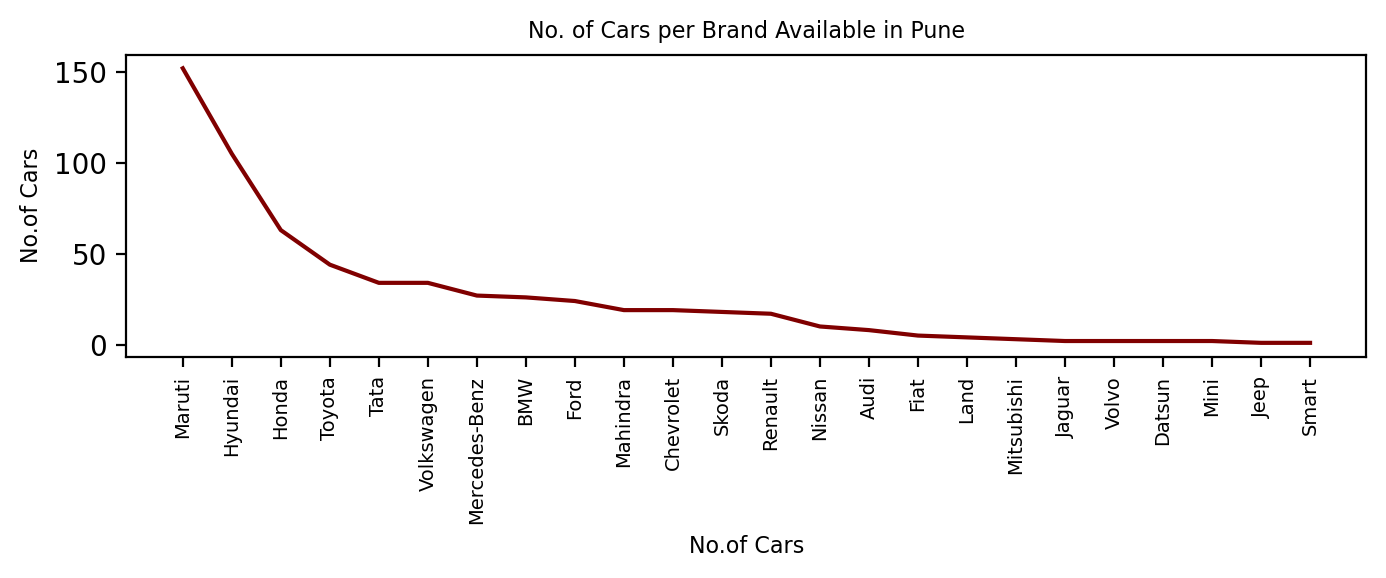

In [155]:
CarB_P= df_Pune['Car_Brand'].value_counts().reset_index()
CarB_P.rename(columns = {'index':'Car_Brand','Car_Brand':'Count'},inplace=True)

plt.figure(figsize=(8,2),dpi=200)
sns.lineplot( x='Car_Brand',y='Count',data=CarB_P,color='maroon')
plt.title("No. of Cars per Brand Available in Pune",fontsize=8)
plt.xlabel("No.of Cars",fontsize=8)
plt.ylabel("No.of Cars",fontsize=8)
plt.xticks(rotation=90,fontsize =7)
plt.show()

#### No. Of Maruti cars available based on Fuel Type

In [170]:
FuelP_P= df_Pune.groupby(['Fuel_Type'])['Car_Model'].count().reset_index()
FuelP_P.rename(columns = {'Car_Model':'Count'},inplace=True)
FuelP_P.sort_values(['Count'])

FuelP_P.T

,0,1,2,3
Fuel_Type,Diesel,LPG,Petrol,Petrol + CNG
Count,288,1,320,13


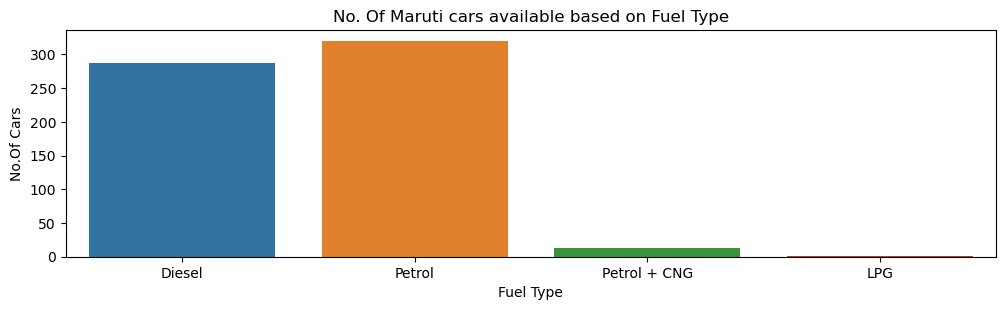

In [173]:

plt.figure(figsize=(12,3),dpi=100)
sns.countplot(x='Fuel_Type',data=df_Pune)
plt.title('No. Of Maruti cars available based on Fuel Type')
plt.ylabel("No.Of Cars")
plt.xlabel("Fuel Type")
plt.show()

#### Automatic Vs Manual Cars Available in Pune

In [175]:
TransP_Count= df_Pune.groupby(['Transmission'])['Car_Brand'].count().reset_index()
TransP_Count.rename(columns = {'Car_Brand':'Count'},inplace=True)
TransP_Count.T

,0,1
Transmission,Automatic,Manual
Count,144,478


#### Price Range of cars in Pune

In [179]:
AvgP_P= df_Pune.groupby(['Car_Brand']).agg({'Price': ['min', 'mean', 'max']}).reset_index()
AvgP_P.rename(columns = {'Price':'Price_Range'},inplace=True)
AvgP_P.T

0      1          2       3     4         5        6   \
Car_Brand          Audi    BMW  Chevrolet  Datsun  Fiat      Ford    Honda   
Price_Range min    11.5   7.99       0.99     3.1  0.85      0.69      0.9   
            mean  24.25  18.94   2.256316   3.525  2.77  4.515833  4.85127   
            max    68.0   50.0       4.65    3.95  4.85      24.0     17.5   

                        7       8     9   ...    14          15      16  \
Car_Brand          Hyundai  Jaguar  Jeep  ...  Mini  Mitsubishi  Nissan   
Price_Range min       0.45    24.0  18.5  ...  17.0         3.0     2.3   
            mean  4.493429    27.5  18.5  ...  26.0    9.316667   4.335   
            max       14.5    31.0  18.5  ...  35.0        15.0     8.0   

                       17        18     19        20         21          22  \
Car_Brand         Renault     Skoda  Smart      Tata     Toyota  Volkswagen   
Price_Range min      2.65      1.25    3.0      0.44        2.6        2.44   
            mean     5.63  4.113889    3.0  2.801176  10.798864    5.019706   
            max       8.0       9.5    3.0     14.25       32.0        11.5   

                     23  
Car_Brand         Volvo  
Price_Range min    13.8  
            mean   14.9  
            max    16.0  

[4 rows x 24 columns]

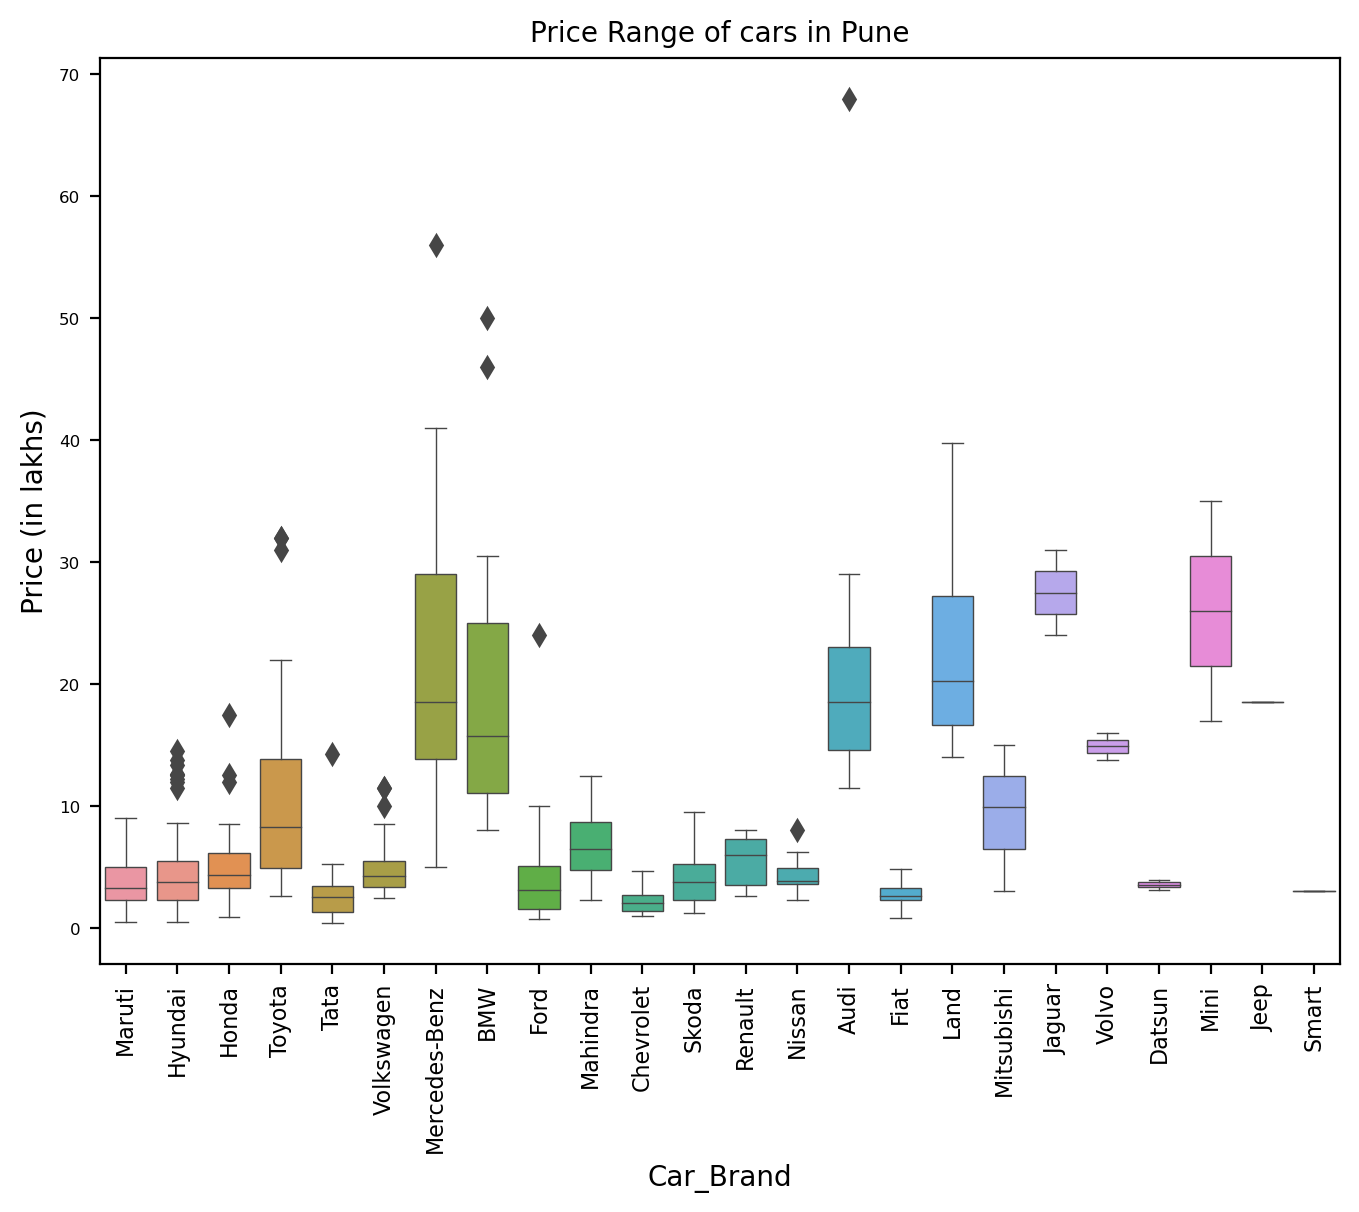

In [181]:
plt.figure(figsize=(8,6),dpi=200)
sns.boxplot( x='Car_Brand',y='Price',orient='v',data=df_Pune,linewidth=0.5,order=df_Pune['Car_Brand'].value_counts().index)
plt.title("Price Range of cars in Pune",fontsize=10)
plt.ylabel("Price (in lakhs)")
plt.yticks(fontsize=6)
plt.xticks(rotation=90,fontsize =8)
plt.show()

#### Mileage of cars available in Pune

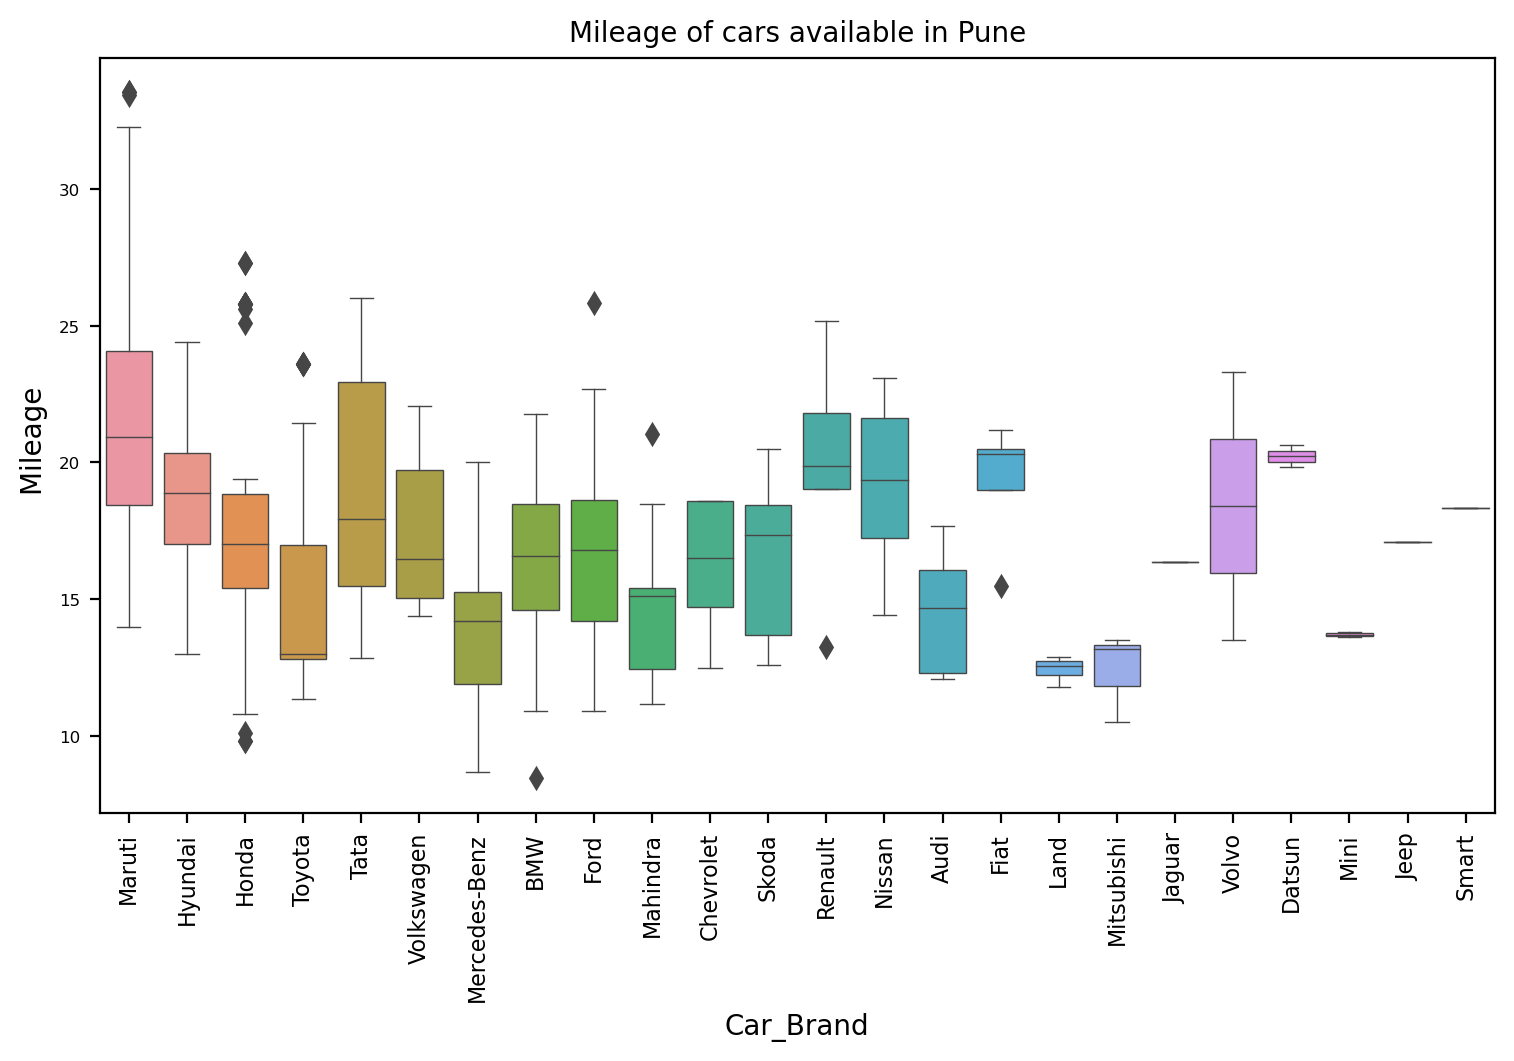

In [182]:
plt.figure(figsize=(9,5),dpi=200)
sns.boxplot( x='Car_Brand',y='Mileage',orient='v',data=df_Pune,linewidth=0.5,order=df_Pune['Car_Brand'].value_counts().index)
plt.title("Mileage of cars available in Pune",fontsize=10)
plt.ylabel("Mileage ")
plt.yticks(fontsize=6)
plt.xticks(rotation=90,fontsize =8)
plt.show()

#### Cars with Max & Min Prices in Pune

In [204]:
df_Pune[df_Pune['Price']==df_Pune['Price'].max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
5009,Pune,2017,59500,Diesel,Automatic,1,14.75,2967.0,245.0,7.0,68.0,Audi,Q7,45 TDI Quattro Technology,50 - 75


In [203]:
df_Pune.loc[df_Pune['Price']==df_Pune['Price'].min()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
1713,Pune,2011,65000,Petrol,Manual,2,26.0,624.0,35.0,4.0,0.44,Tata,Nano,Lx,0 - 5


..

### Car brands with maximum cars having 0-5 lakh price category 

In [48]:
Pr_P = df_Pune.groupby(['Car_Brand','Price_Category'])['Car_Model'].count().reset_index()
Pr_P.rename(columns = {'Car_Model':'Count'},inplace=True)
Pr_P= Pr_P.sort_values(['Price_Category'],ascending=True)
Pr_P= Pr_P.sort_values(['Count'],ascending=False)
Pr_P.head(10).T

,120,70,60,121,200,71,220,61,20,50
Car_Brand,Maruti,Hyundai,Honda,Maruti,Tata,Hyundai,Volkswagen,Honda,Chevrolet,Ford
Price_Category,0 - 5,0 - 5,0 - 5,5 - 10,0 - 5,5 - 10,0 - 5,5 - 10,0 - 5,0 - 5
Count,114,72,40,38,32,24,22,20,19,18


..

### Insights From Pune City:

- Most available brands - Maruti(150+), Hyundai(120+), Honda(80+).
- Cars availability - Petrol(320), Diesel(288), Petrol+CNG(13)
- Availability based on Gear - Automatic(144), Manual(478)
- High Budget car - Audi Q7 45 TDI Quattro Technology Diesel-Automatic:	68.0Lakhs (2017)	
- Low Budget car -  Tata Nano LX 1.0 : 0.44Lakhs (2011)
- Car_Brands like Maruti, Hyundai, Honada has maximum number of cars available in 0-5Lakhs price category

..

#### Creating seperate dataframes for top 3 Car brands have a 0 -5 lakhs price cateogry

In [49]:
df_Pmaruti  = df_Pune[(df_Pune['Car_Brand']=='Maruti') & (df_Pune['Price_Category']=='0 - 5') & (df_Pune['Year']>= 2010)]
df_PHyundai = df_Pune[(df_Pune['Car_Brand']=='Hyundai') & (df_Pune['Price_Category']=='0 - 5') & (df_Pune['Year']>= 2010)]
df_PHonda   = df_Pune[(df_Pune['Car_Brand']=='Honda') & (df_Pune['Price_Category']=='0 - 5') & (df_Pune['Year']>= 2010)]

## Used Maruti Cars Analysis

In [50]:
df_Pmaruti.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2012.952941,62099.882353,1.188235,21.683412,1099.558667,70.378735,5.058824,3.286235
std,2.086840,35389.681600,0.449712,4.171746,154.299386,11.465420,0.471899,0.930576
min,2010.000000,7000.000000,1.000000,14.000000,796.000000,35.000000,4.000000,1.300000
25%,2011.000000,37000.000000,1.000000,18.900000,998.000000,67.040000,5.000000,2.500000
50%,2013.000000,60000.000000,1.000000,21.100000,998.000000,67.100000,5.000000,3.150000
75%,2015.000000,75000.000000,1.000000,23.200000,1248.000000,74.245617,5.000000,4.200000
max,2017.000000,197000.000000,3.000000,33.540000,1586.000000,103.300000,8.000000,5.000000


..

In [51]:
Pm_cm=df_Pmaruti.groupby(['Car_Model'])['Engine'].count().reset_index()
Pm_cm.rename(columns={'Engine':'Count'},inplace=True)
Pm_cm.T

,0,1,2,3,4,5,6,7,8,9,10,11
Car_Model,A-Star,Alto,Celerio,Dzire,Eeco,Ertiga,Omni,Ritz,SX4,Swift,WagonR,Zen
Count,3,14,8,2,1,1,1,7,1,27,19,1


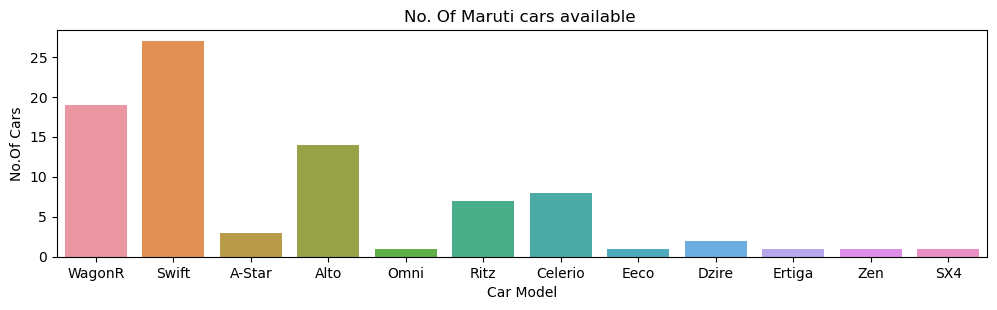

In [52]:
df_Pmaruti['Seats'].replace(4,5,inplace=True)
plt.figure(figsize=(12,3),dpi=100)
sns.countplot(x='Car_Model',data=df_Pmaruti)
plt.title('No. Of Maruti cars available ')
plt.ylabel("No.Of Cars")
plt.xlabel("Car Model")
plt.show()

..

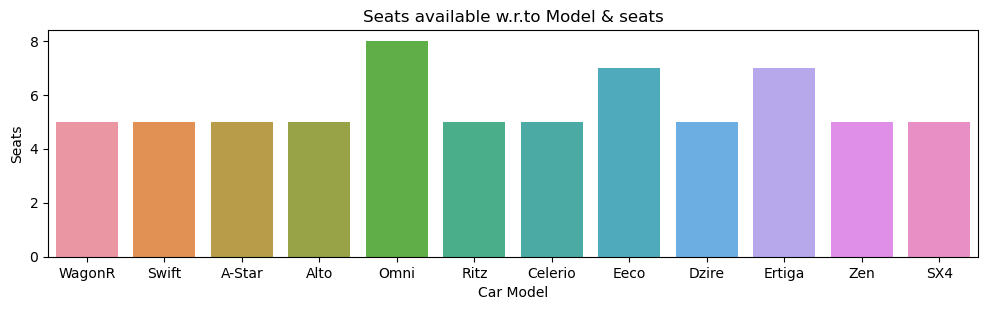

In [53]:
df_Pmaruti['Seats'].replace(4,5,inplace=True)
plt.figure(figsize=(12,3),dpi=100)
sns.barplot(x='Car_Model',y='Seats',data=df_Pmaruti)
plt.title('Seats available w.r.to Model & seats')
plt.ylabel("Seats")
plt.xlabel("Car Model")
plt.show()

..

In [54]:
Pm_cm_o=df_Pmaruti.groupby(['Car_Model','Owner_Type'])['Engine'].count().reset_index()
Pm_cm_o.rename(columns={'Engine':'Count'},inplace=True)
Pm_cm_o.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Car_Model,A-Star,A-Star,Alto,Alto,Celerio,Dzire,Dzire,Eeco,Ertiga,Omni,Ritz,Ritz,SX4,Swift,Swift,Swift,WagonR,WagonR,Zen
Owner_Type,1,2,1,2,1,1,3,1,1,1,1,2,2,1,2,3,1,2,1
Count,2,1,12,2,8,1,1,1,1,1,5,2,1,21,5,1,18,1,1


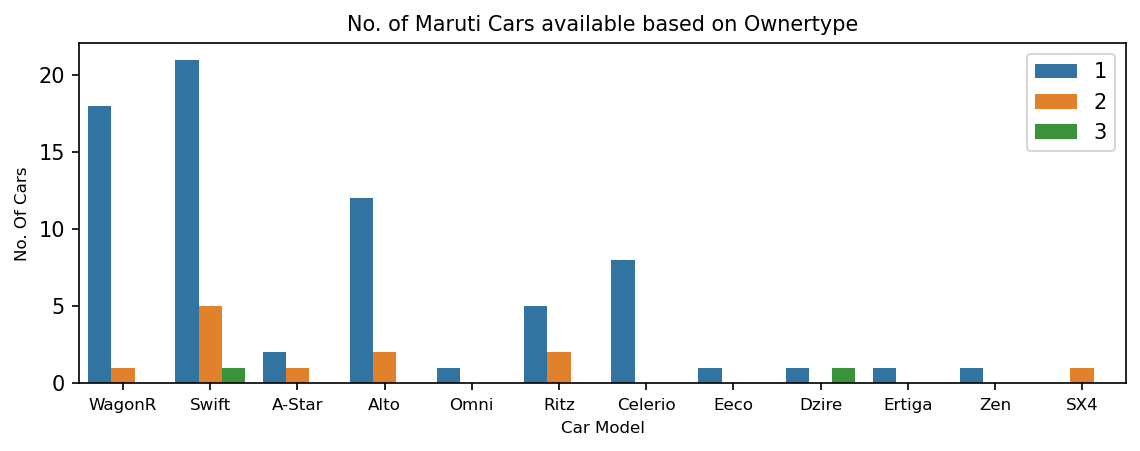

In [55]:
plt.figure(figsize=(9,3),dpi=150)
sns.countplot(x='Car_Model',hue='Owner_Type',data=df_Pmaruti)
plt.title('No. of Maruti Cars available based on Ownertype',fontsize=10)
plt.legend(loc='upper right')
plt.ylabel("No. Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

..

In [64]:
Pm_cmf=df_Pmaruti.groupby(['Car_Model','Fuel_Type']).agg(({'Price': [ 'min','mean','max']})).reset_index()
Pm_cmf.T

0         1             2        3       4       5   \
Car_Model         A-Star      Alto          Alto  Celerio   Dzire   Dzire   
Fuel_Type         Petrol    Petrol  Petrol + CNG   Petrol  Diesel  Petrol   
Price     min       1.95       1.8           3.0      3.9    2.25     4.5   
          mean  1.983333  2.559167          3.05  4.38125    2.25     4.5   
          max        2.0      3.75           3.1      5.0    2.25     4.5   

                    6       7       8         9       10      11      12  \
Car_Model         Eeco  Ertiga    Omni      Ritz    Ritz     SX4   Swift   
Fuel_Type       Petrol  Diesel  Petrol    Diesel  Petrol  Petrol  Diesel   
Price     min     2.25     4.5    1.45       3.0     3.5     2.7     3.1   
          mean    2.25     4.5    1.45  3.573333     3.5     2.7   4.075   
          max     2.25     4.5    1.45      4.35     3.5     2.7     5.0   

                    13        14            15      16  
Car_Model        Swift    WagonR        WagonR     Zen  
Fuel_Type       Petrol    Petrol  Petrol + CNG  Petrol  
Price     min      1.3       2.0           2.9     2.0  
          mean   3.434  2.741818         3.295     2.0  
          max      4.9      3.41           3.9     2.0

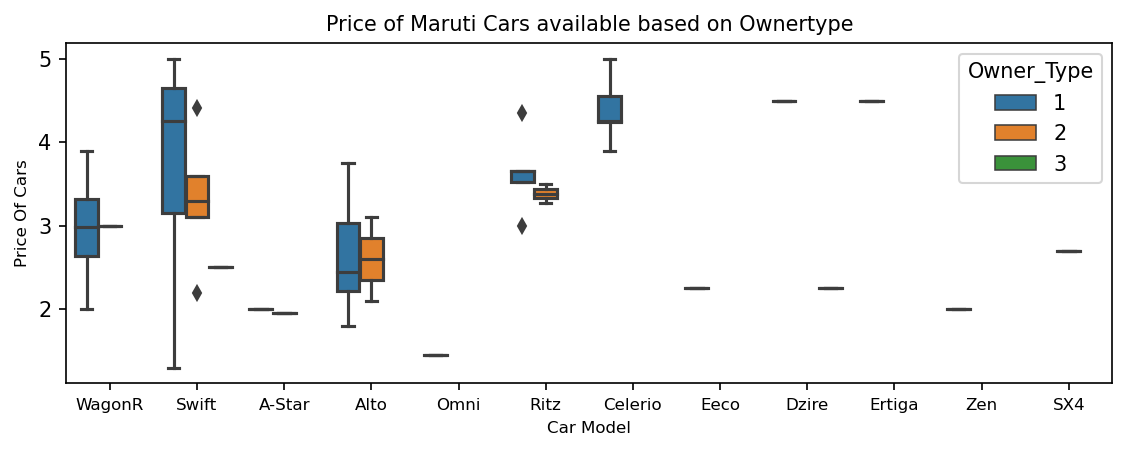

In [100]:
plt.figure(figsize=(9,3),dpi=150)
sns.boxplot(x='Car_Model',y='Price',hue='Owner_Type',data=df_Pmaruti)
plt.title('Price of Maruti Cars available based on Ownertype',fontsize=10)
plt.ylabel("Price Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

..

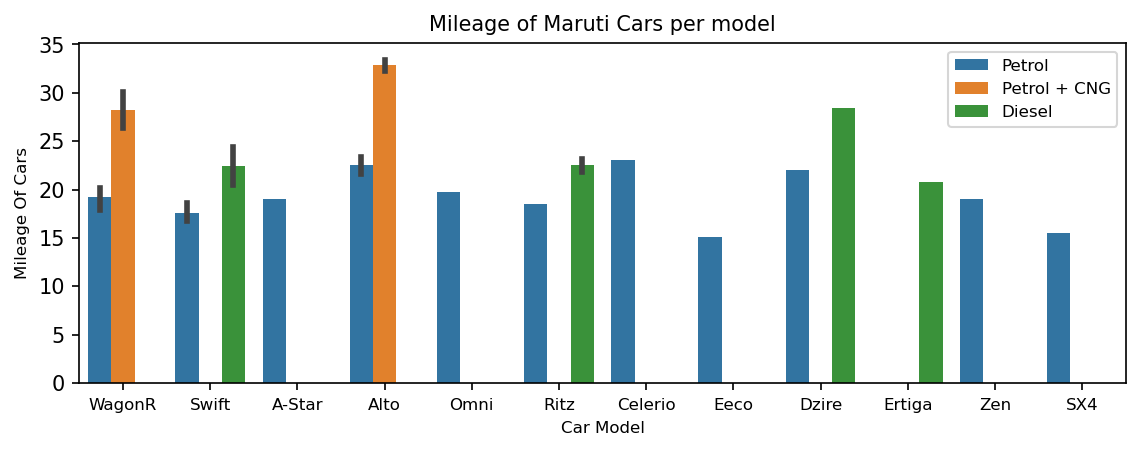

In [66]:
plt.figure(figsize=(9,3),dpi=150)
sns.barplot(x='Car_Model',y='Mileage',data=df_Pmaruti,hue='Fuel_Type')
plt.legend(loc='upper right',fontsize=8)
plt.title('Mileage of Maruti Cars per model',fontsize=10)
plt.ylabel("Mileage Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

..

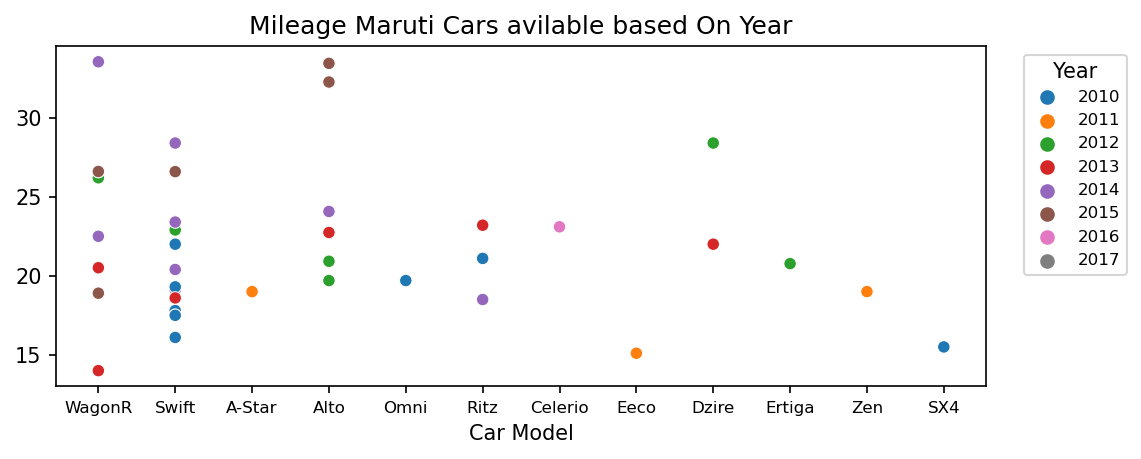

In [83]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Mileage',data=df_Pmaruti,hue='Year',palette='tab10')
plt.title('Mileage Maruti Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)

plt.show()

..

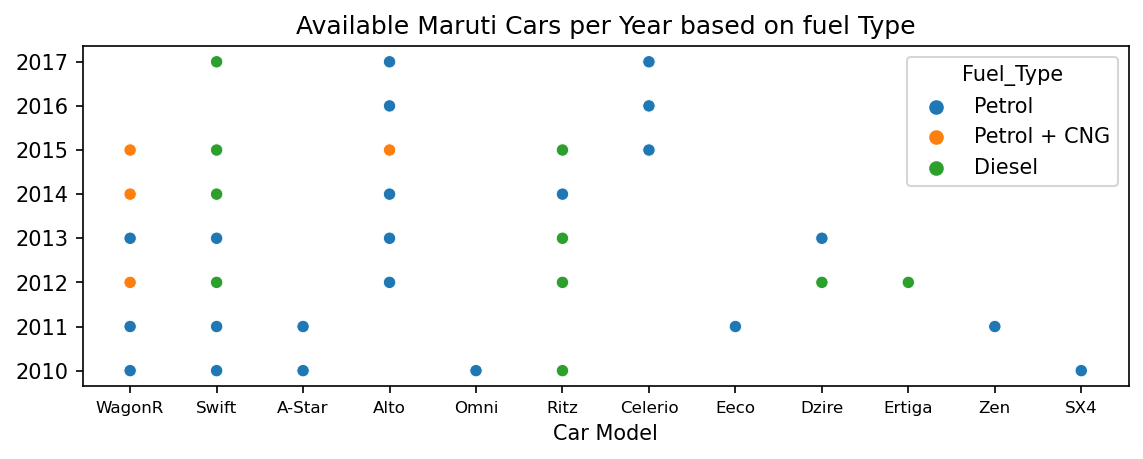

In [211]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_Pmaruti,hue='Fuel_Type')
plt.title('Available Maruti Cars per Year based on fuel Type')
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)

plt.show()

..

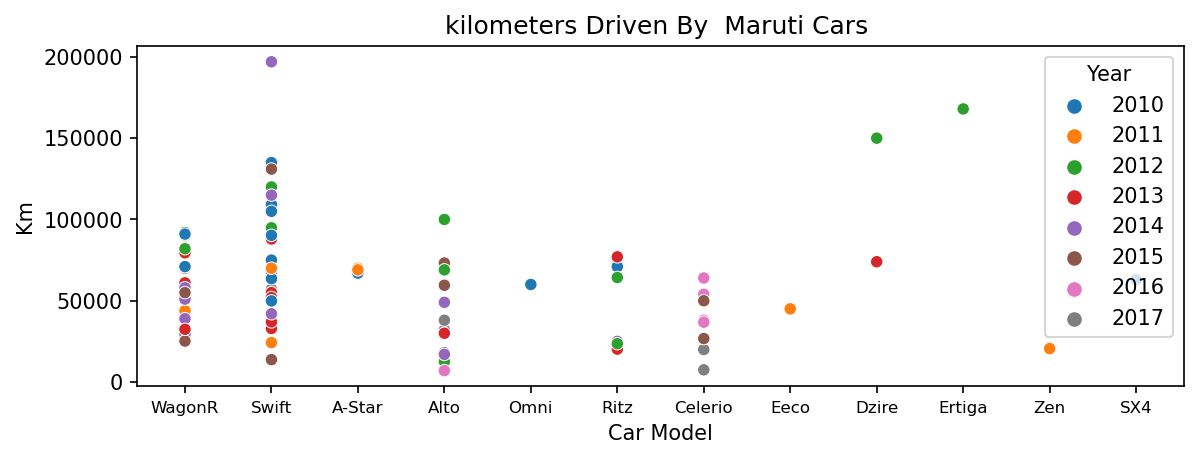

In [106]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(y='Kilometers_Driven',x='Car_Model',data=df_Pmaruti,hue='Year',palette='tab10')
plt.title('kilometers Driven By  Maruti Cars ')
plt.ylabel("Km")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

..

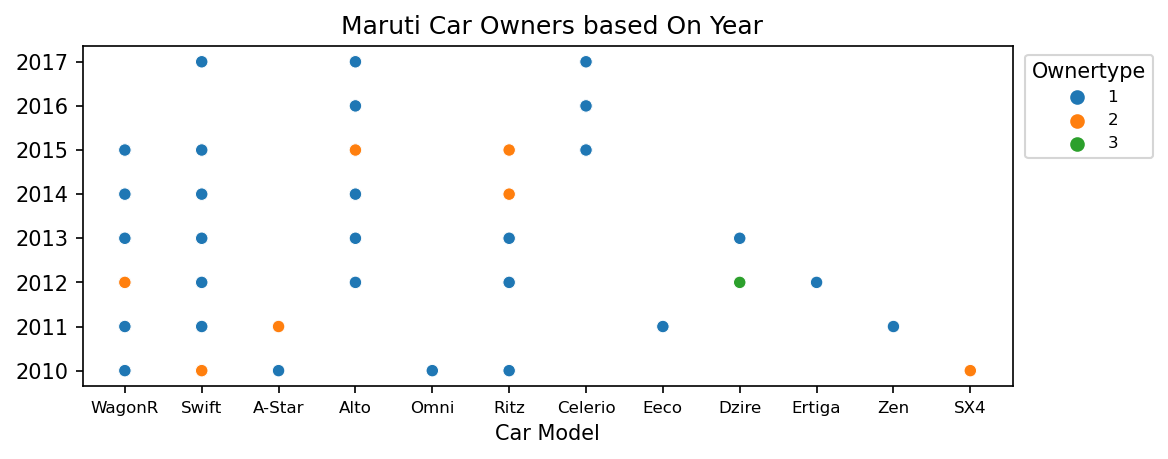

In [108]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_Pmaruti,hue='Owner_Type',palette='tab10')
plt.title(' Maruti Car Owners based On Year')
plt.legend(title='Ownertype',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

..

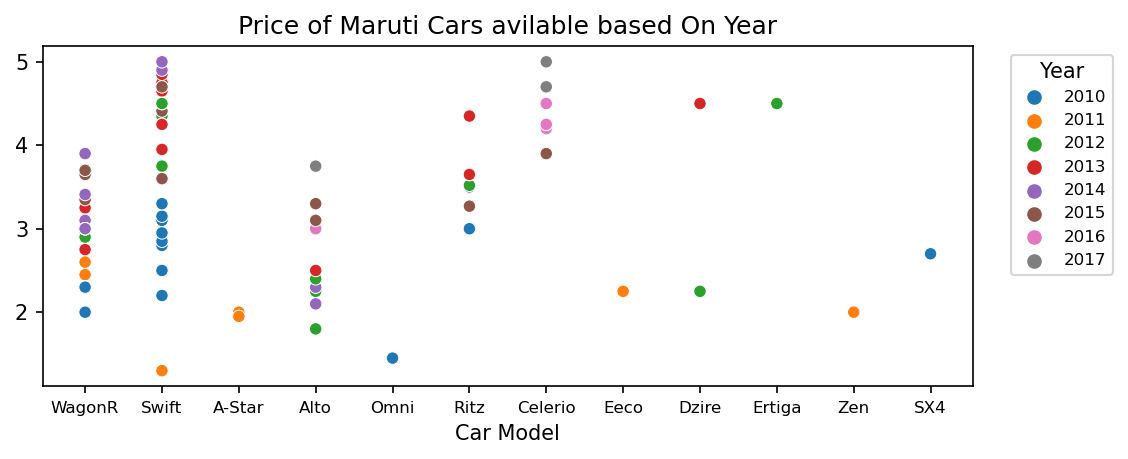

In [82]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Price',data=df_Pmaruti,hue='Year',palette='tab10')
plt.title('Price of Maruti Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)

plt.show()

..

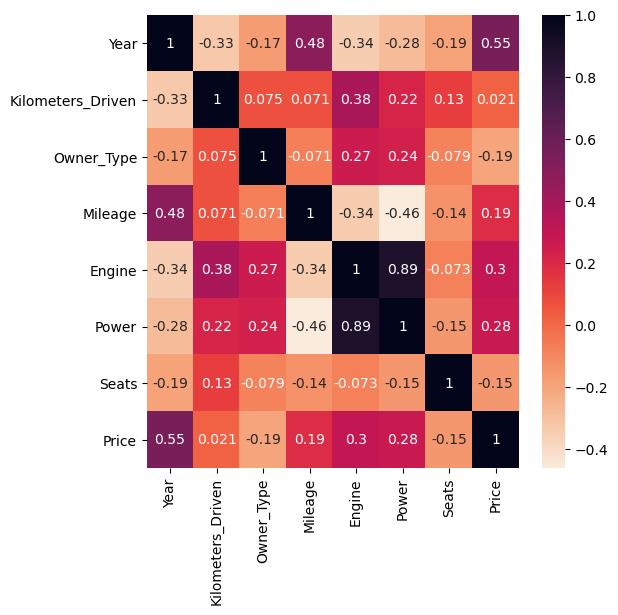

In [84]:
plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(df_Pmaruti.corr(),annot =True,cmap = 'rocket_r')
plt.show()

## Used Hyundai Cars Analysis

In [85]:
df_Pmaruti.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2012.952941,62099.882353,1.188235,21.683412,1099.558667,70.378735,5.082353,3.286235
std,2.086840,35389.681600,0.449712,4.171746,154.299386,11.465420,0.442174,0.930576
min,2010.000000,7000.000000,1.000000,14.000000,796.000000,35.000000,5.000000,1.300000
25%,2011.000000,37000.000000,1.000000,18.900000,998.000000,67.040000,5.000000,2.500000
50%,2013.000000,60000.000000,1.000000,21.100000,998.000000,67.100000,5.000000,3.150000
75%,2015.000000,75000.000000,1.000000,23.200000,1248.000000,74.245617,5.000000,4.200000
max,2017.000000,197000.000000,3.000000,33.540000,1586.000000,103.300000,8.000000,5.000000


In [86]:
Phy_cm=df_PHyundai.groupby(['Car_Model'])['Engine'].count().reset_index()
Phy_cm.rename(columns={'Engine':'Count'},inplace=True)
Phy_cm.T

,0,1,2,3,4,5,6
Car_Model,EON,Grand,Santro,Verna,Xcent,i10,i20
Count,6,7,4,6,4,9,14


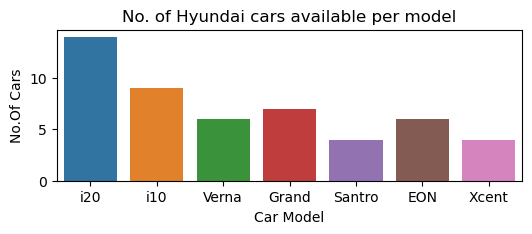

In [89]:
df_PHyundai['Seats'].replace(4,5,inplace=True)

plt.figure(figsize=(6,2),dpi=100)
sns.countplot(x='Car_Model',data=df_PHyundai)
plt.title('No. of Hyundai cars available per model')
plt.ylabel("No.Of Cars")
plt.xlabel("Car Model")
plt.show()

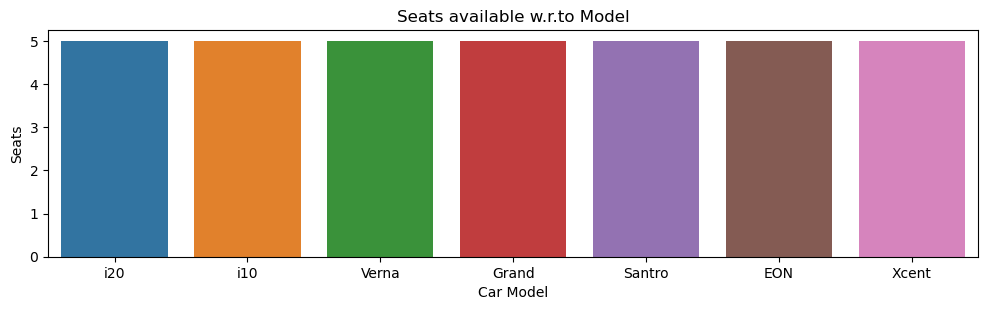

In [94]:
df_Pmaruti['Seats'].replace(4,5,inplace=True)
plt.figure(figsize=(12,3),dpi=100)
sns.barplot(x='Car_Model',y='Seats',data=df_PHyundai)
plt.title('Seats available w.r.to Model')
plt.ylabel("Seats")
plt.xlabel("Car Model")
plt.show()

In [92]:
Phy_cm_o=df_PHyundai.groupby(['Car_Model','Owner_Type'])['Engine'].count().reset_index()
Phy_cm_o.rename(columns={'Engine':'Count'},inplace=True)
Phy_cm_o.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Car_Model,EON,Grand,Grand,Santro,Santro,Verna,Verna,Xcent,i10,i10,i10,i20,i20
Owner_Type,1,1,2,1,2,1,2,1,1,2,3,1,2
Count,6,6,1,1,3,4,2,4,4,4,1,7,7


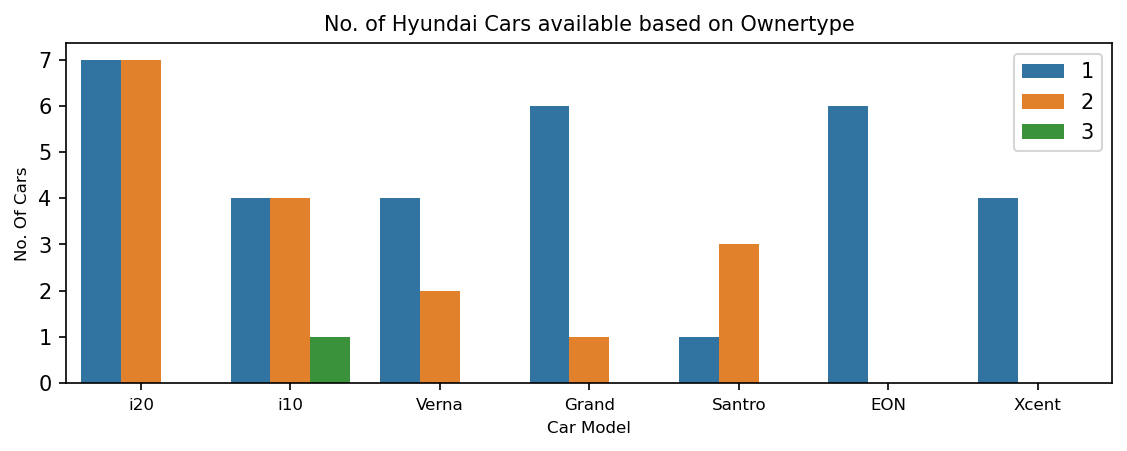

In [95]:
plt.figure(figsize=(9,3),dpi=150)
sns.countplot(x='Car_Model',hue='Owner_Type',data=df_PHyundai)
plt.title('No. of Hyundai Cars available based on Ownertype',fontsize=10)
plt.legend(loc='upper right')
plt.ylabel("No. Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

In [97]:
Pm_cmf=df_PHyundai.groupby(['Car_Model','Fuel_Type']).agg(({'Price': [ 'min','mean','max']})).reset_index()
Pm_cmf.T

0       1       2       3       4       5       6  \
Car_Model            EON   Grand  Santro  Santro   Verna   Xcent   Xcent   
Fuel_Type         Petrol  Petrol     LPG  Petrol  Petrol  Diesel  Petrol   
Price     min        2.1    2.25    1.65     1.6     2.5     3.8     5.0   
          mean  2.651667    4.25    1.65     1.8     4.0    4.15     5.0   
          max       3.05     5.0    1.65     2.1     5.0     4.5     5.0   

                       7       8         9  
Car_Model            i10     i20       i20  
Fuel_Type         Petrol  Diesel    Petrol  
Price     min        2.3     3.8      2.74  
          mean  3.083333   4.068  3.182222  
          max       3.85    4.25      3.85

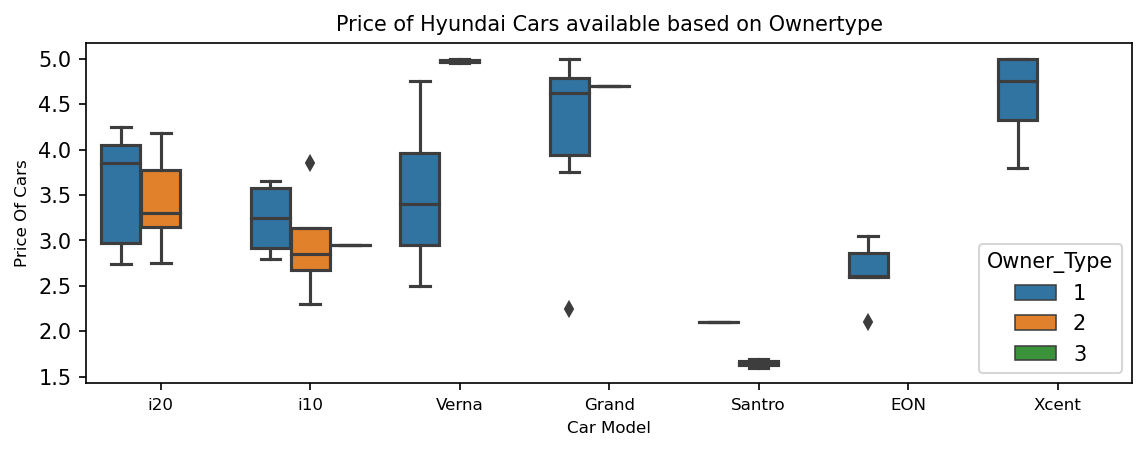

In [99]:
plt.figure(figsize=(9,3),dpi=150)
sns.boxplot(x='Car_Model',y='Price',hue='Owner_Type',data=df_PHyundai)
plt.title('Price of Hyundai Cars available based on Ownertype',fontsize=10)
plt.ylabel("Price Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

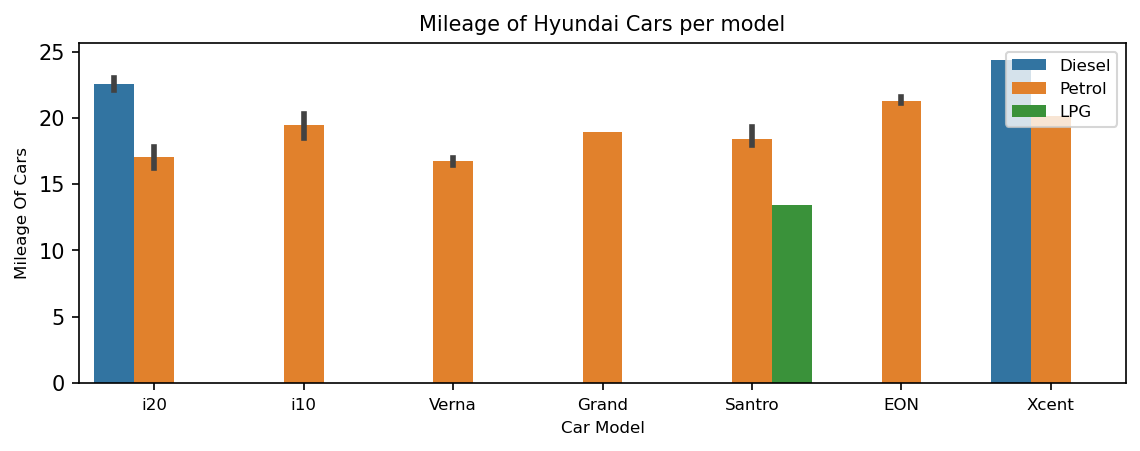

In [134]:
plt.figure(figsize=(9,3),dpi=150)
sns.barplot(x='Car_Model',y='Mileage',data=df_PHyundai,hue='Fuel_Type')
plt.legend(loc='upper right',fontsize=8)
plt.title('Mileage of Hyundai Cars per model',fontsize=10)
plt.ylabel("Mileage Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

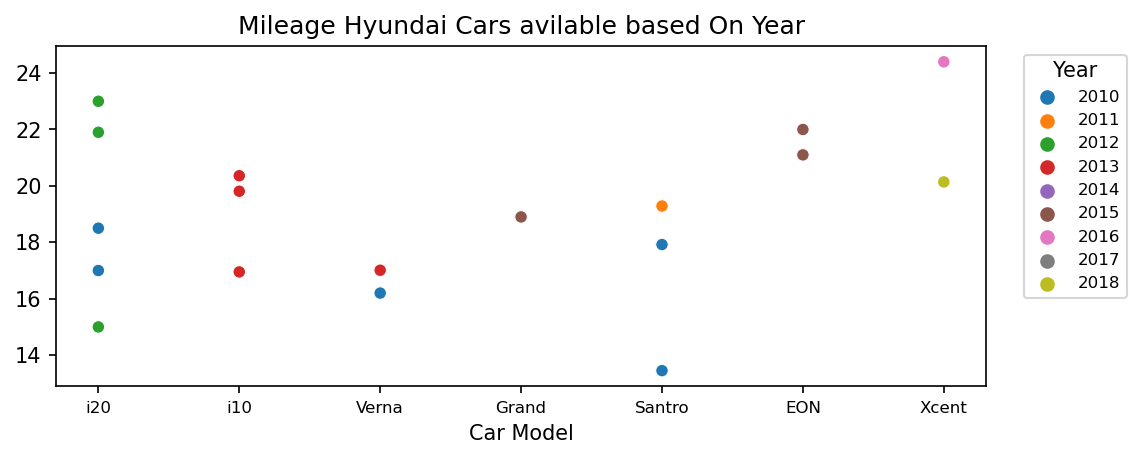

In [102]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Mileage',data=df_PHyundai,hue='Year',palette='tab10')
plt.title('Mileage Hyundai Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)

plt.show()

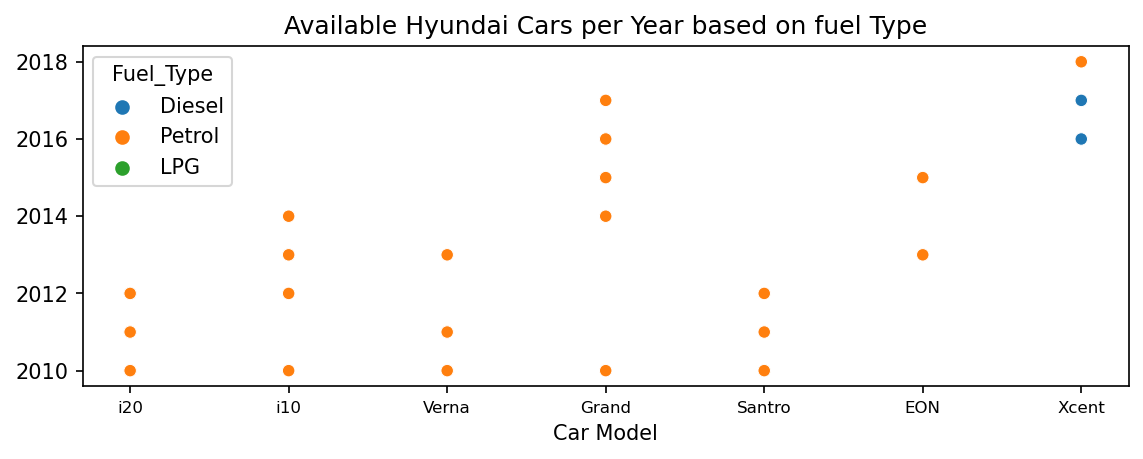

In [212]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_PHyundai,hue='Fuel_Type')
plt.title('Available Hyundai Cars per Year based on fuel Type')
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)

plt.show()

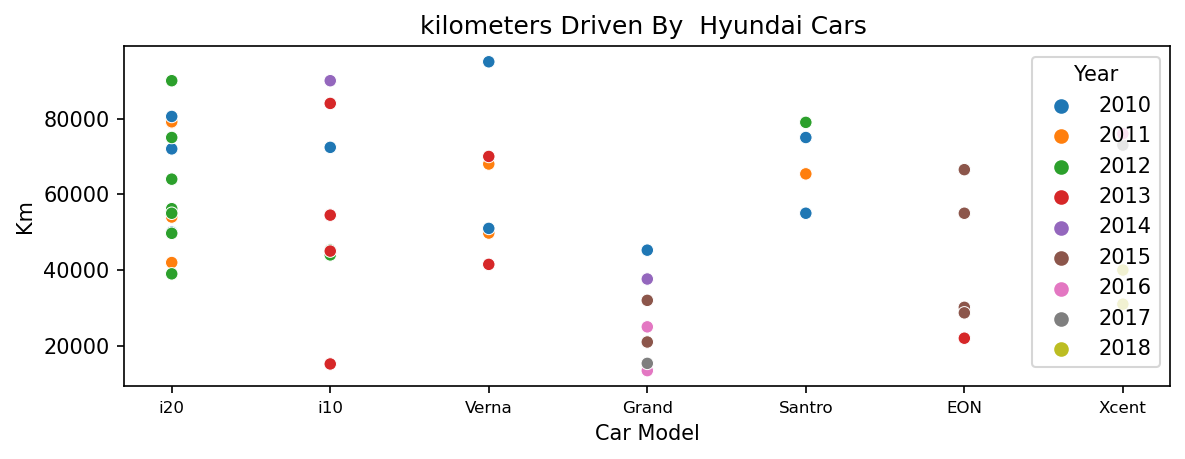

In [107]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(y='Kilometers_Driven',x='Car_Model',data=df_PHyundai,hue='Year',palette='tab10')
plt.title('kilometers Driven By  Hyundai Cars ')
plt.ylabel("Km")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

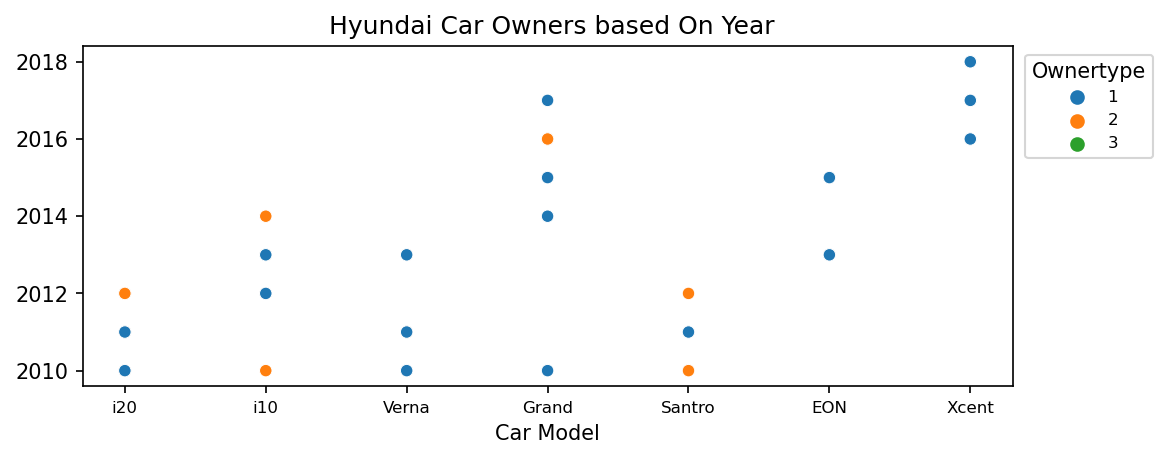

In [132]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_PHyundai,hue='Owner_Type',palette='tab10')
plt.title(' Hyundai Car Owners based On Year')
plt.legend(title='Ownertype',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

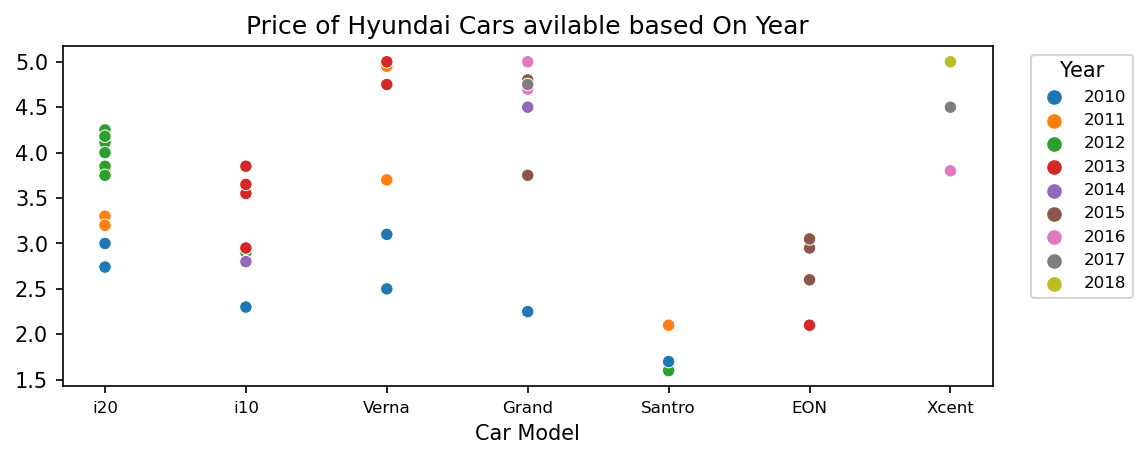

In [110]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Price',data=df_PHyundai,hue='Year',palette='tab10')
plt.title('Price of Hyundai Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

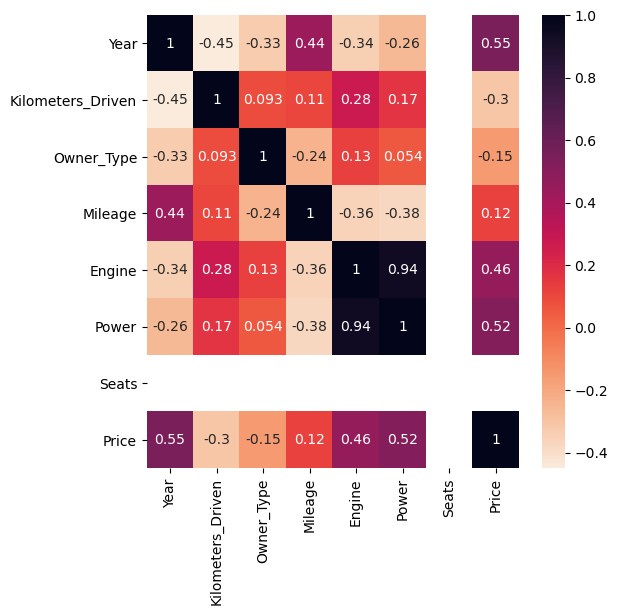

In [113]:
plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(df_PHyundai.corr(),annot =True,cmap = 'rocket_r')
plt.show()

## Used Honda Cars Analysis

In [115]:
df_PHonda.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000
mean,2012.583333,66397.291667,1.416667,18.683333,1397.977298,102.164214,5.0,3.871667
std,1.471960,23756.034974,0.503610,3.550097,191.233964,15.665774,0.0,0.700371
min,2010.000000,42023.000000,1.000000,13.900000,1198.000000,86.700000,5.0,2.300000
25%,2012.000000,47750.000000,1.000000,16.800000,1198.000000,86.800000,5.0,3.250000
50%,2012.000000,60350.000000,1.000000,17.500000,1497.000000,98.600000,5.0,4.050000
75%,2014.000000,79000.000000,2.000000,19.400000,1498.000000,116.725000,5.0,4.500000
max,2015.000000,127000.000000,2.000000,25.800000,1799.000000,130.300000,5.0,4.900000


In [114]:
Phy_cm=df_PHonda.groupby(['Car_Model'])['Engine'].count().reset_index()
Phy_cm.rename(columns={'Engine':'Count'},inplace=True)
Phy_cm.T

,0,1,2,3,4
Car_Model,Amaze,Brio,City,Civic,Jazz
Count,8,6,7,2,1


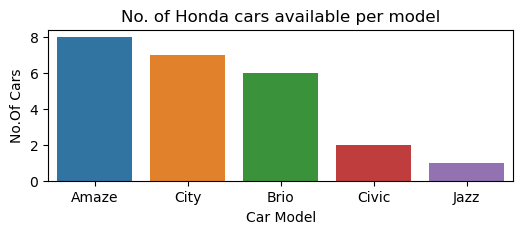

In [117]:
df_PHonda['Seats'].replace(4,5,inplace=True)

plt.figure(figsize=(6,2),dpi=100)
sns.countplot(x='Car_Model',data=df_PHonda)
plt.title('No. of Honda cars available per model')
plt.ylabel("No.Of Cars")
plt.xlabel("Car Model")
plt.show()

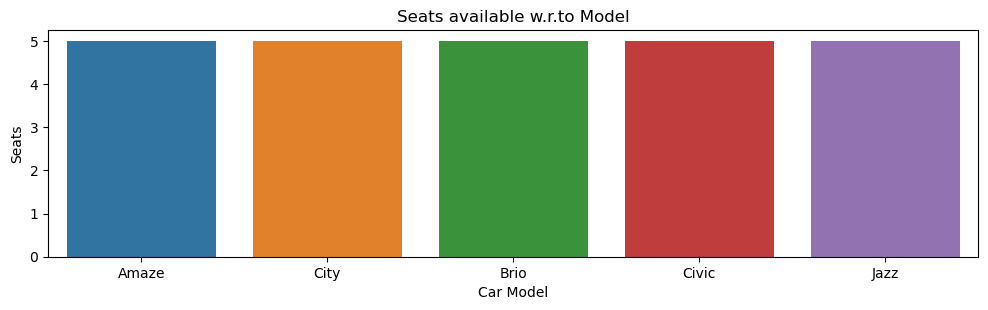

In [118]:
df_Pmaruti['Seats'].replace(4,5,inplace=True)
plt.figure(figsize=(12,3),dpi=100)
sns.barplot(x='Car_Model',y='Seats',data=df_PHonda)
plt.title('Seats available w.r.to Model')
plt.ylabel("Seats")
plt.xlabel("Car Model")
plt.show()

In [119]:
Phy_cm_o=df_PHonda.groupby(['Car_Model','Owner_Type'])['Engine'].count().reset_index()
Phy_cm_o.rename(columns={'Engine':'Count'},inplace=True)
Phy_cm_o.T

,0,1,2,3,4,5,6,7,8
Car_Model,Amaze,Amaze,Brio,Brio,City,City,Civic,Civic,Jazz
Owner_Type,1,2,1,2,1,2,1,2,1
Count,4,4,5,1,3,4,1,1,1


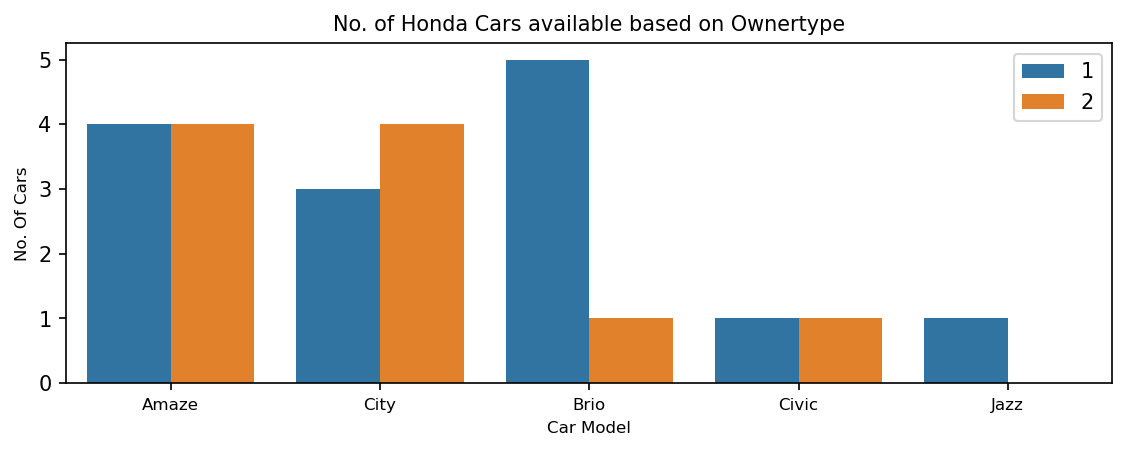

In [121]:
plt.figure(figsize=(9,3),dpi=150)
sns.countplot(x='Car_Model',hue='Owner_Type',data=df_PHonda)
plt.title('No. of Honda Cars available based on Ownertype',fontsize=10)
plt.legend(loc='upper right')
plt.ylabel("No. Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

In [122]:
Pm_cmf=df_PHonda.groupby(['Car_Model','Fuel_Type']).agg(({'Price': [ 'min','mean','max']})).reset_index()
Pm_cmf.T

0       1         2         3       4       5
Car_Model        Amaze   Amaze      Brio      City   Civic    Jazz
Fuel_Type       Diesel  Petrol    Petrol    Petrol  Petrol  Petrol
Price     min      4.1    3.79       2.3       3.5    2.95    3.15
          mean  4.4375    4.07  3.038333  4.294286   3.725    3.15
          max     4.65    4.34      3.28       4.9     4.5    3.15

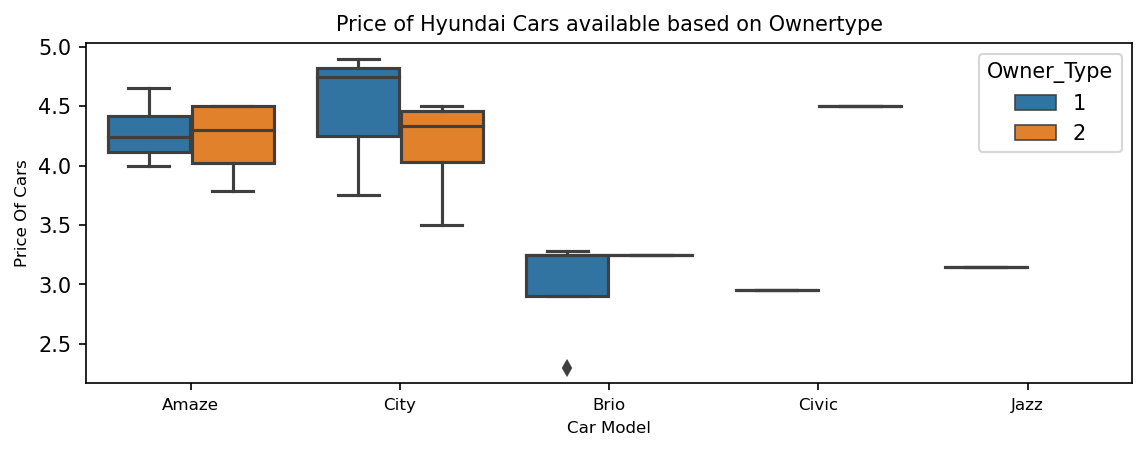

In [123]:
plt.figure(figsize=(9,3),dpi=150)
sns.boxplot(x='Car_Model',y='Price',hue='Owner_Type',data=df_PHonda)
plt.title('Price of Hyundai Cars available based on Ownertype',fontsize=10)
plt.ylabel("Price Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

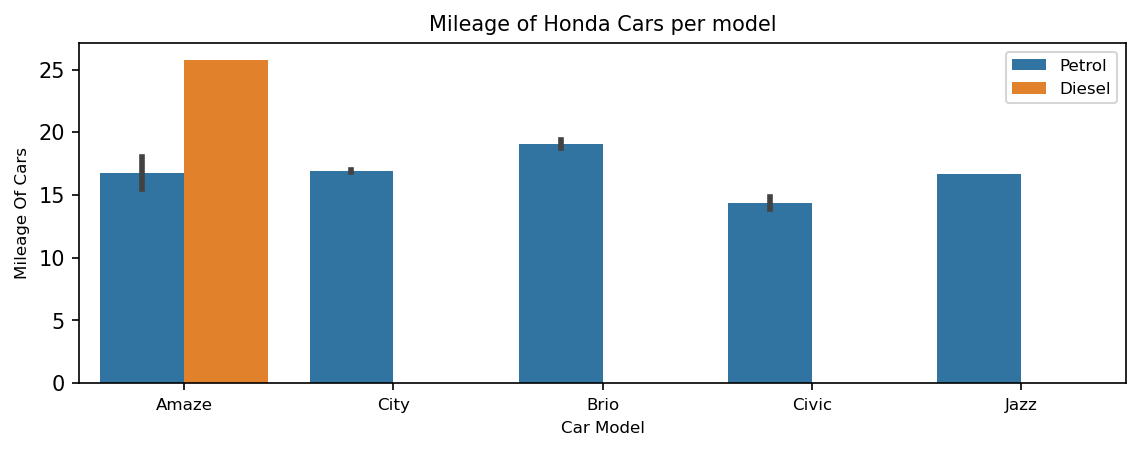

In [126]:
plt.figure(figsize=(9,3),dpi=150)
sns.barplot(x='Car_Model',y='Mileage',data=df_PHonda,hue='Fuel_Type')
plt.legend(loc='upper right',fontsize=8)
plt.title('Mileage of Honda Cars per model',fontsize=10)
plt.ylabel("Mileage Of Cars",fontsize=8)
plt.xlabel("Car Model",fontsize=8)
plt.xticks(fontsize =8)
plt.show()

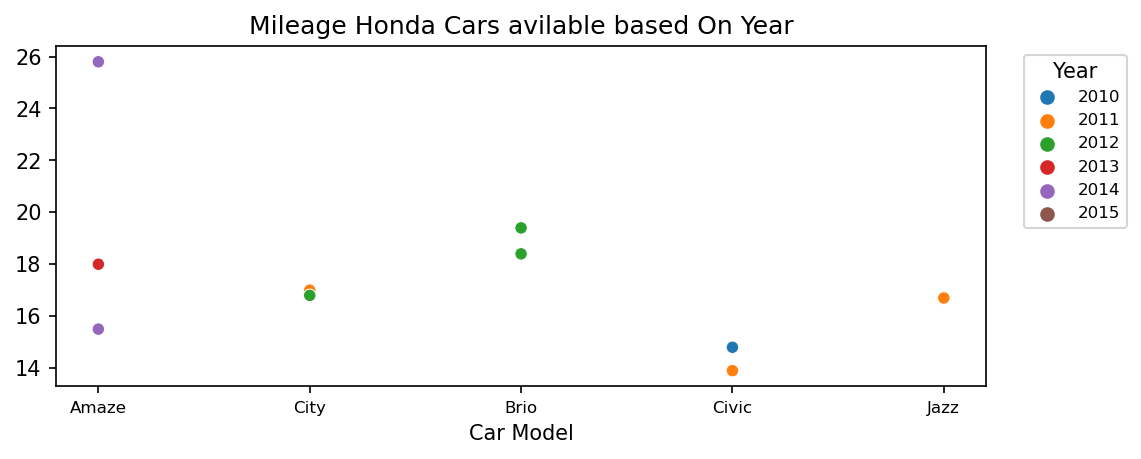

In [125]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Mileage',data=df_PHonda,hue='Year',palette='tab10')
plt.title('Mileage Honda Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

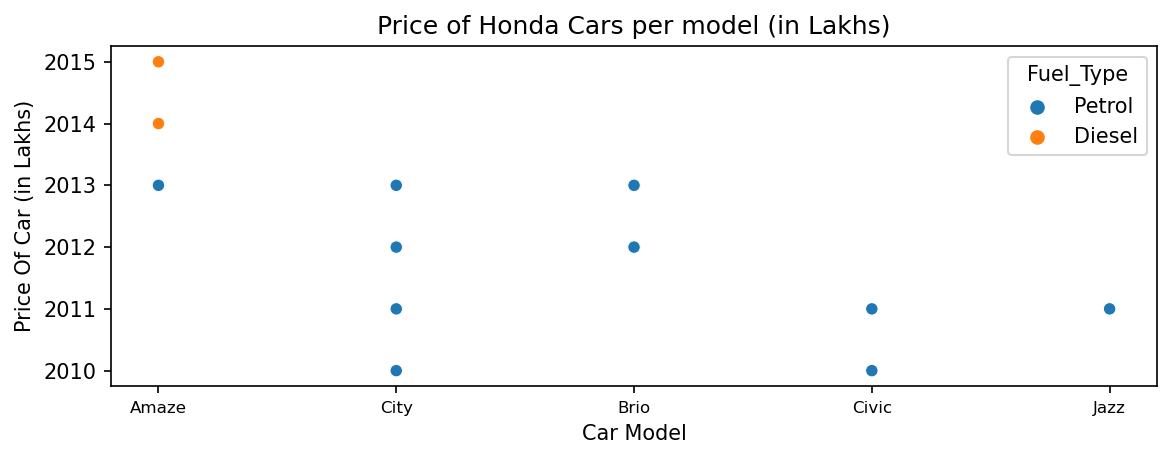

In [127]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_PHonda,hue='Fuel_Type')
plt.title('Price of Honda Cars per model (in Lakhs)')
plt.ylabel("Price Of Car (in Lakhs)")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

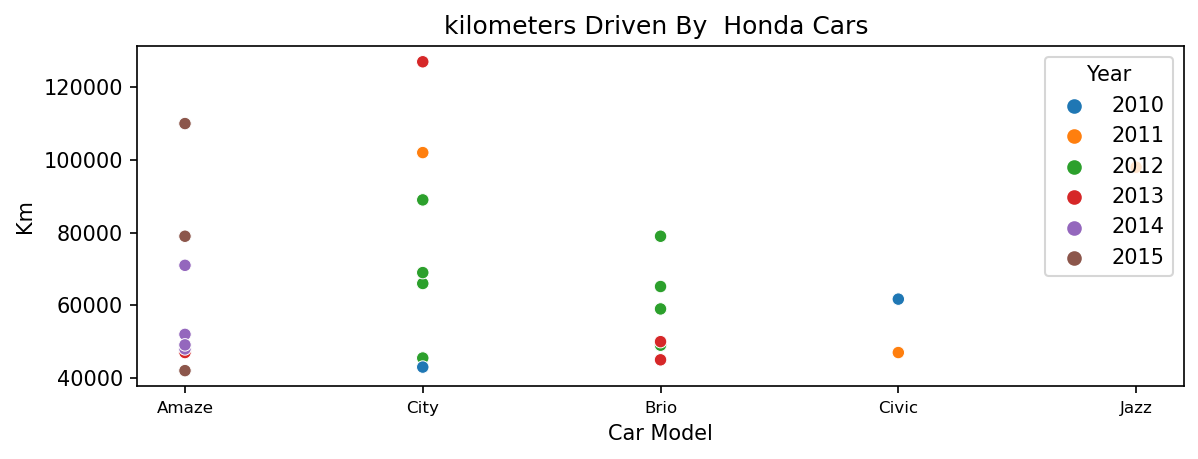

In [128]:
plt.figure(figsize=(9,3),dpi=150)
sns.scatterplot(y='Kilometers_Driven',x='Car_Model',data=df_PHonda,hue='Year',palette='tab10')
plt.title('kilometers Driven By  Honda Cars ')
plt.ylabel("Km")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

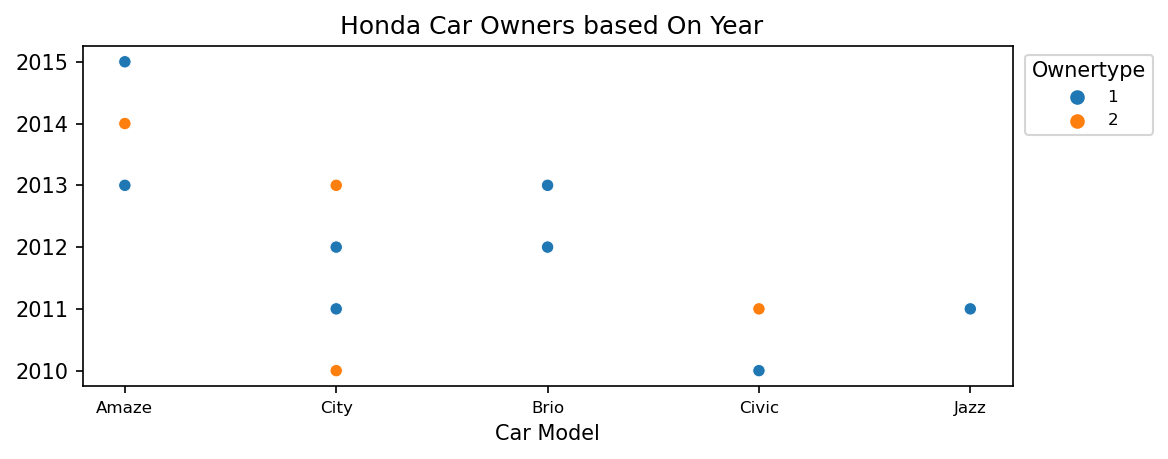

In [129]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Year',data=df_PHonda,hue='Owner_Type',palette='tab10')
plt.title(' Honda Car Owners based On Year')
plt.legend(title='Ownertype',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

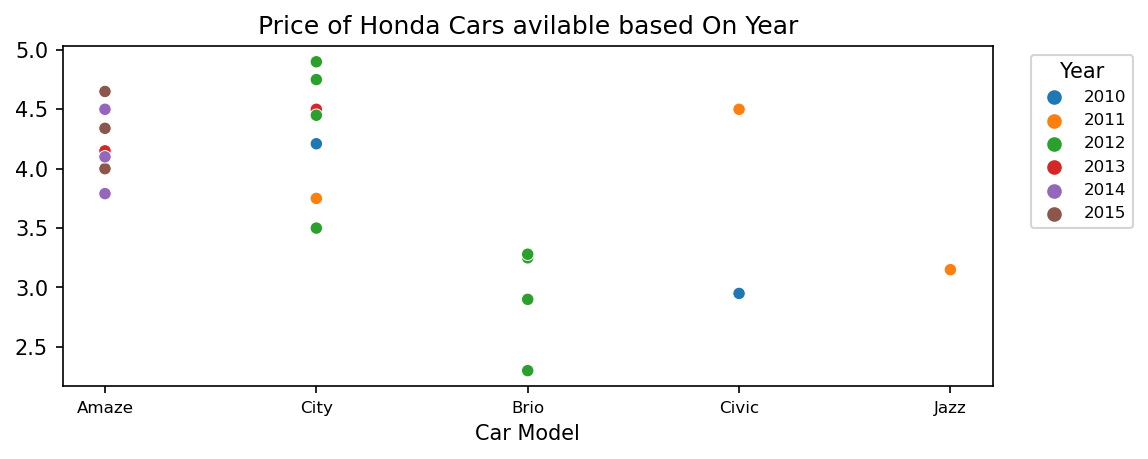

In [213]:
plt.figure(figsize=(8,3),dpi=150)
sns.scatterplot(x='Car_Model',y='Price',data=df_PHonda,hue='Year',palette='tab10')
plt.title('Price of Honda Cars avilable based On Year')
plt.legend(title='Year',loc='upper right',fontsize=8,bbox_to_anchor=(1.16, 1))
plt.ylabel("")
plt.xlabel("Car Model")
plt.xticks(fontsize =8)
plt.show()

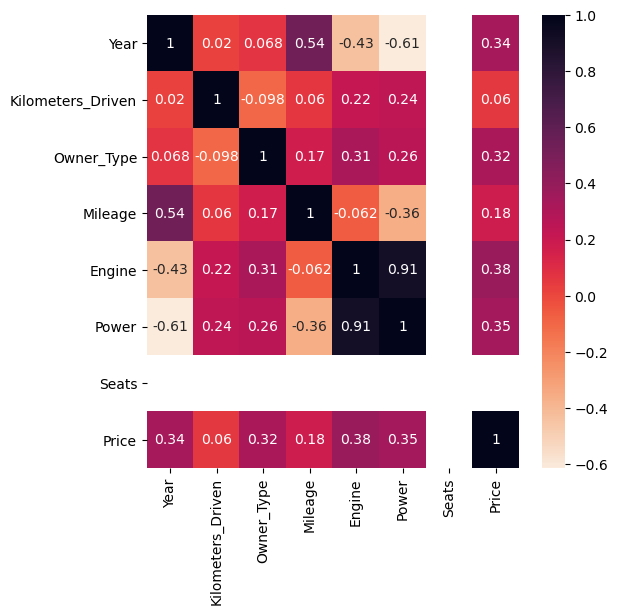

In [131]:
plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(df_PHonda.corr(),annot =True,cmap = 'rocket_r')
plt.show()

In [233]:
df_PHonda[df_PHonda['Car_Model']=='Amaze']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Varient,Price_Category
496,Pune,2015,79000,Petrol,Manual,1,18.0,1198.0,86.7,5.0,4.00,Honda,Amaze,VX i-Vtech,0 - 5
2063,Pune,2013,47000,Petrol,Manual,1,18.0,1198.0,86.7,5.0,4.15,Honda,Amaze,VX i-Vtech,0 - 5
2273,Pune,2014,52000,Diesel,Manual,2,25.8,1498.0,98.6,5.0,4.10,Honda,Amaze,S i-Dtech,0 - 5
2339,Pune,2014,48000,Diesel,Manual,2,25.8,1498.0,98.6,5.0,4.50,Honda,Amaze,S i-Dtech,0 - 5
2961,Pune,2015,42023,Petrol,Automatic,1,15.5,1198.0,86.7,5.0,4.34,Honda,Amaze,S AT i-Vtech,0 - 5
3238,Pune,2015,110000,Diesel,Manual,1,25.8,1498.0,98.6,5.0,4.65,Honda,Amaze,S i-Dtech,0 - 5
4078,Pune,2014,49112,Petrol,Automatic,2,15.5,1198.0,86.7,5.0,3.79,Honda,Amaze,S AT i-Vtech,0 - 5
4829,Pune,2014,71000,Diesel,Manual,2,25.8,1498.0,98.6,5.0,4.50,Honda,Amaze,S i-Dtech,0 - 5


## Conclusion:

#### Between Maruti, Hyundai & Honda if customer wants to buy:

#### Maruti then preffered choices are

 1. WagonR RCNG-LXI (2014)                         
    - Petrol+CnG
    - 33.53 kmpl
    - 29,202 Km driven 
    - 1st Owner
    - Price 3.90L
    
    
 2. Alto 800 CNG-LXI (2015)
    - Petrol+CnG
    - 33.44 kmpl
    - 18,000 Km driven 
    - 1st Owner
    - Price 3.00L 
    
  
  3. Swift Desire LDI (2017)
    - Disel
    - 27 kmpl
    - 57,202 Km driven 
    - 1st Owner
    - Price 4.25L
    
    
  4. Ertiga VDi (2012) : 7 Seater
    - Disel
    - 21 kmpl
    - 1,68,000 Km driven 
    - 1st Owner
    - Price 4.50L  
    
#### Hyundai then preffered choices are

 1. Xcent 1.1 CRDI Base (2017)                         
    - Disel
    - 24.45 kmpl
    - 73,000 Km driven 
    - 1st Owner
    - Price 4.5L
    
    
 2. Eon Magna (2015)
    - Petrol+CnG
    - 22 kmpl
    - 55,000 Km driven 
    - 1st Owner
    - Price 2.61L  
    
 
 2. i20 1.4 Asta Crdi with AVN (2012)
    - Disel
    - 23 kmpl
    - 75,000 Km driven 
    - 1st Owner
    - Price 4.0L 

#### Honda then preffered choices are

 1. Amaze S i-Dtech (2015)                         
    - Disel
    - 25.80 kmpl
    - 1,11,000 Km driven 
    - 1st Owner
    - Price 4.6L
    
    
 2. Amaze S i-Dtech (2014)                         
    - Disel
    - 25.80 kmpl
    - 48,000 Km driven 
    - 1st Owner
    - Price 4.1L  

